In [1]:
import os
import pandas as pd
import numpy as np

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')


In [2]:
parasitized = r'C:\Users\kingk\Desktop\caleb\cell_images\Parasitized'
uninfected= r'C:\Users\kingk\Desktop\caleb\cell_images\Uninfected'


In [4]:
print('parasitized lenght:', len(os.listdir(parasitized)))
print('uninfected lenght:', len(os.listdir(uninfected)))

parasitized lenght: 13780
uninfected lenght: 13780


In [5]:
img_classes  = os.listdir(r'C:\Users\kingk\Desktop\caleb\cell_images')
print(img_classes)

['Parasitized', 'Uninfected']


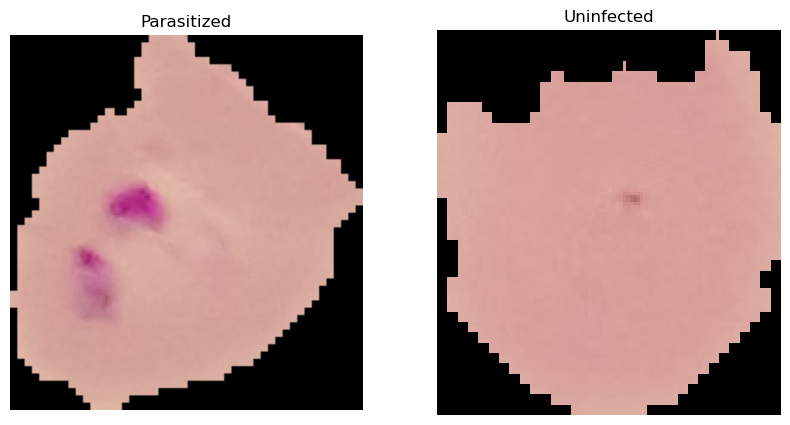

In [13]:
# Paths to the Parasitized and Uninfected folders
parasitized_folder = r'C:\Users\kingk\Desktop\caleb\cell_images\Parasitized'
uninfected_folder = r'C:\Users\kingk\Desktop\caleb\cell_images\Uninfected'

def display_images_in_row(parasitized_folder, uninfected_folder, index=3):
    def get_image(folder_path, index):
        # List all image files and filter out non-image files
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Ensure the folder contains image files and the index is valid
        if len(image_files) > 0 and index < len(image_files):
            # Return the image path
            image_path = os.path.join(folder_path, image_files[index])
            return Image.open(image_path)
        else:
            print(f"No image files found or invalid index.")
            return None

    # Get the images from both folders
    parasitized_image = get_image(parasitized_folder, index)
    uninfected_image = get_image(uninfected_folder, index)

    # Display the images side by side
    if parasitized_image and uninfected_image:
        plt.figure(figsize=(10, 5))  # Set figure size for both images
        # Show first image
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first image
        plt.imshow(parasitized_image)
        plt.title("Parasitized")
        plt.axis('off')  # Hide axis

        # Show second image
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second image
        plt.imshow(uninfected_image)
        plt.title("Uninfected")
        plt.axis('off')  # Hide axis

        plt.show()

# Display the images in the same row
display_images_in_row(parasitized_folder, uninfected_folder, index=3)



In [2]:
# Define the path to the data directory
data_dir = r'C:\Users\kingk\Desktop\caleb\cell_images'

# Prepare file paths and labels
filepaths = []
labels = []

# Collect file paths and labels
folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Create DataFrame
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

In [3]:
# Split data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)


Simple_cnn_model

In [5]:
img_classes  = os.listdir(r'C:\Users\kingk\Desktop\caleb\cell_images')
print(img_classes)

['Parasitized', 'Uninfected']


Simple_cnn_model 

In [4]:
datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

# Validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Test data generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 22046 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.


In [70]:
from tensorflow.keras import layers, models


# Build a simple CNN model
simple_cnn_model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3), padding ='same'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding ='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.35),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding ='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    layers.Conv2D(128, (3, 3), activation='relu', padding ='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.45),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')  # Binary classification
    
])

# Compile the model
simple_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

simple_cnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,921 (12.63 MB)

 Trainable params: 3,309,441 (12.62 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,          # Wait for 5 epochs with no improvement
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce learning rate when validation loss stops improving
    factor=0.5,          # Reduce learning rate by half
    patience=3,          # Wait for 3 epochs before reducing learning rate
    verbose=1            # Print messages when learning rate is reduced
    
)
callbacks=[early_stop, lr_scheduler]

In [72]:
# Train the model
history = simple_cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 438s 630ms/step - accuracy: 0.5930 - loss: 1.1391 - val_accuracy: 0.4942 - val_loss: 7.0942 - learning_rate: 0.0010
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 430s 625ms/step - accuracy: 0.7326 - loss: 0.5269 - val_accuracy: 0.4953 - val_loss: 6.2694 - learning_rate: 0.0010
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 429s 622ms/step - accuracy: 0.9095 - loss: 0.2568 - val_accuracy: 0.8774 - val_loss: 0.2659 - learning_rate: 0.0010
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 429s 623ms/step - accuracy: 0.9384 - loss: 0.1995 - val_accuracy: 0.9347 - val_loss: 0.1884 - learning_rate: 0.0010
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 429s 623ms/step - accuracy: 0.9419 - loss: 0.1797 - val_accuracy: 0.9557 - val_loss: 0.1241 - learning_rate: 0.0010
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 434s 630ms/step - accuracy: 0.9450 - loss: 0.1758 - val_accuracy: 0.9623 - val_loss: 0.1214 - learning_rate: 0.0010
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 428s 621ms/step - accura

In [73]:
# Evaluate the performance of the model on the test set
test_loss, test_acc = simple_cnn_model.evaluate(test_generator)


87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.9483 - loss: 0.1620


In [75]:
# Evaluate the performance of the model on the validation set
val_loss, val_acc = simple_cnn_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9678 - loss: 0.1032


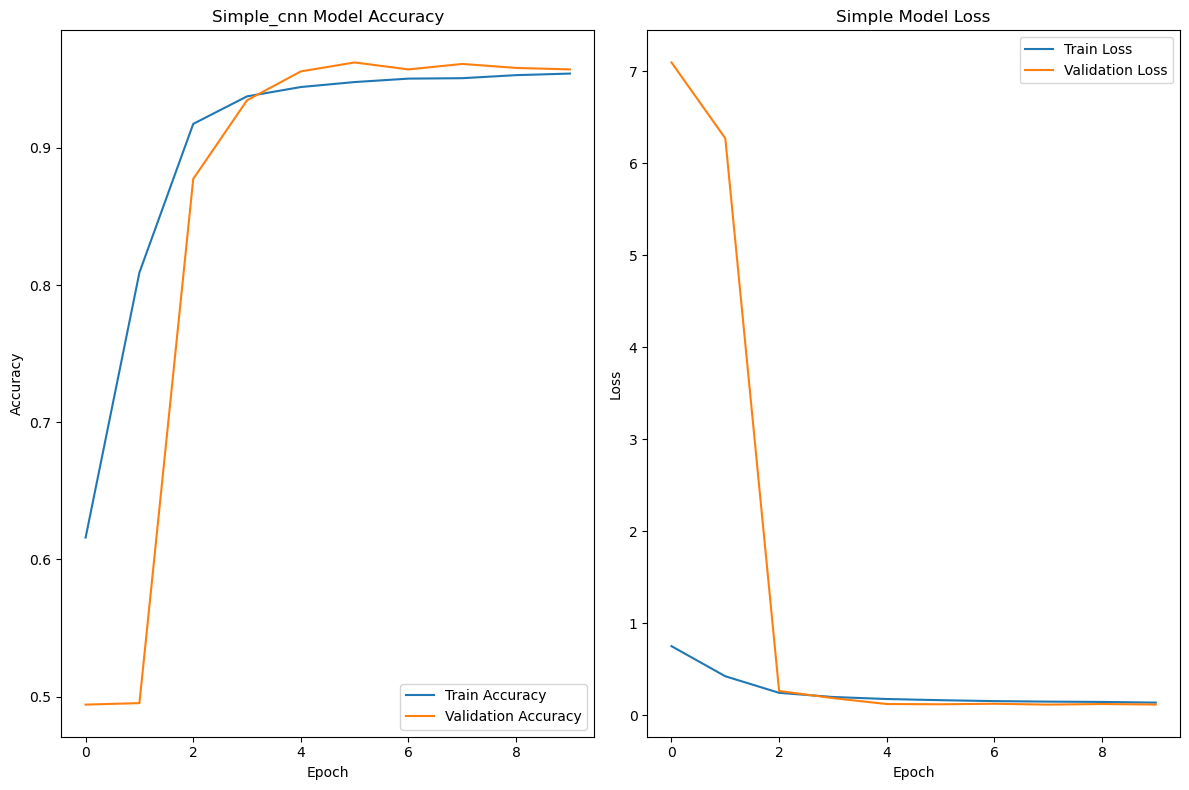

In [76]:
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple_cnn Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Simple Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [77]:
# Predicted probabilities from the model
pred_probabilities = simple_cnn_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance at this threshold
print(classification_report(test_generator.classes, predictions))


87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1400
           1       0.92      0.98      0.95      1356

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756



In [78]:
confusion_matrix(test_generator.classes, predictions)

array([[1282,  118],
       [  23, 1333]], dtype=int64)

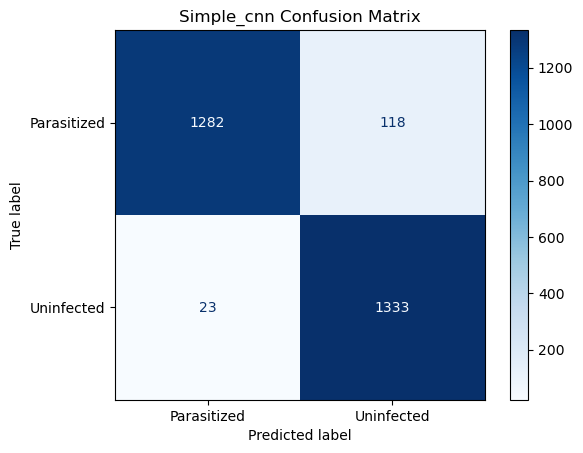

In [79]:
# The confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)

# Extract the labels directly from class_indices (no need for conditional checks)
labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# Adding title and showing the plot
plt.title('Simple_cnn Confusion Matrix')
plt.show()

In [81]:
img_classes  = os.listdir(r'C:\Users\kingk\Desktop\caleb\cell_images')
print(img_classes)

['Parasitized', 'Uninfected']


first image to predict
actual label: Parasitized
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
predicted label: Parasitized


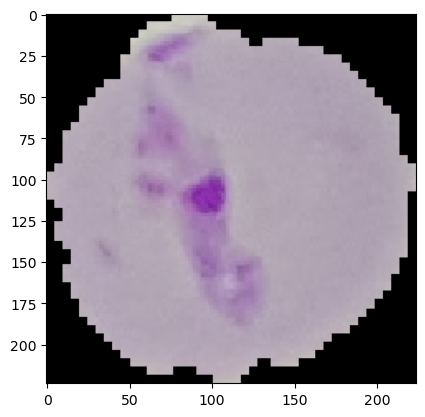

In [87]:
import numpy as np

for images_batch, label_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', img_classes[first_label])
    
    batch_prediction = simple_cnn_model.predict(images_batch)
    print('predicted label:', img_classes[np.argmax(batch_prediction[0])])
    
    break

In [88]:
save_model(simple_cnn_model, 'Simple_cnn.keras')
save_model(simple_cnn_model, 'Simple_cnn.h5')

87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step


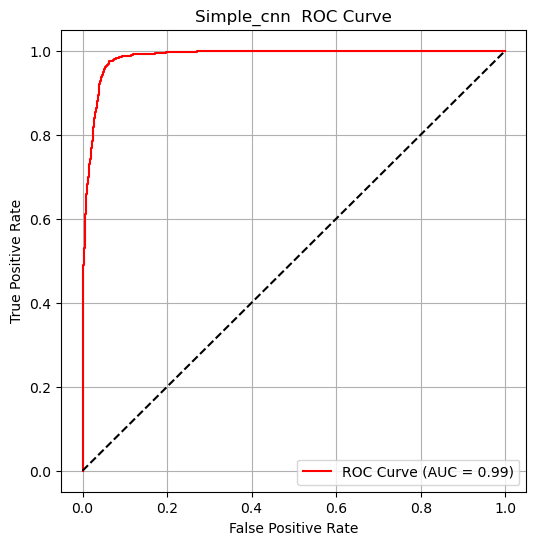

In [11]:
# Load pre-trained models
simple_cnn_model = load_model(r"C:\Users\kingk\Downloads\CNN\Simple_cnn.h5")

# True labels
y_true = test_generator.classes 

y_pred = simple_cnn_model.predict(test_generator)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Simple_cnn  ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Transfer Learning Models

In [144]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

In [145]:
image_size = (224, 224, 3)

datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest',
)


# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',  # Assuming binary classification
    batch_size=32,
    shuffle=True
)



# Validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


# Test data generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 22046 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.


# XCEPTION

In [195]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models

# Load the Xception model with pre-trained weights, excluding the top layers
xception_base = Xception(weights='imagenet', include_top=False, input_shape=image_size)

# Freeze the layers
xception_base.trainable = False

# Add custom top layers
xception_model = models.Sequential([
    xception_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
xception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xception_model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,992,681 (80.08 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [196]:
history = xception_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1873s 3s/step - accuracy: 0.8731 - loss: 0.3059 - val_accuracy: 0.9176 - val_loss: 0.2024 - learning_rate: 0.0010
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1881s 3s/step - accuracy: 0.9082 - loss: 0.2411 - val_accuracy: 0.9296 - val_loss: 0.1898 - learning_rate: 0.0010
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1734s 3s/step - accuracy: 0.9165 - loss: 0.2175 - val_accuracy: 0.9325 - val_loss: 0.1836 - learning_rate: 0.0010
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1636s 2s/step - accuracy: 0.9150 - loss: 0.2268 - val_accuracy: 0.9351 - val_loss: 0.1788 - learning_rate: 0.0010
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1721s 2s/step - accuracy: 0.9161 - loss: 0.2225 - val_accuracy: 0.9354 - val_loss: 0.1738 - learning_rate: 0.0010


In [197]:
# Evaluate the model
test_loss, test_acc = xception_model.evaluate(test_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9343 - loss: 0.1860


In [198]:
# Evaluate the model on the validation set
val_loss, val_acc = xception_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9361 - loss: 0.1805


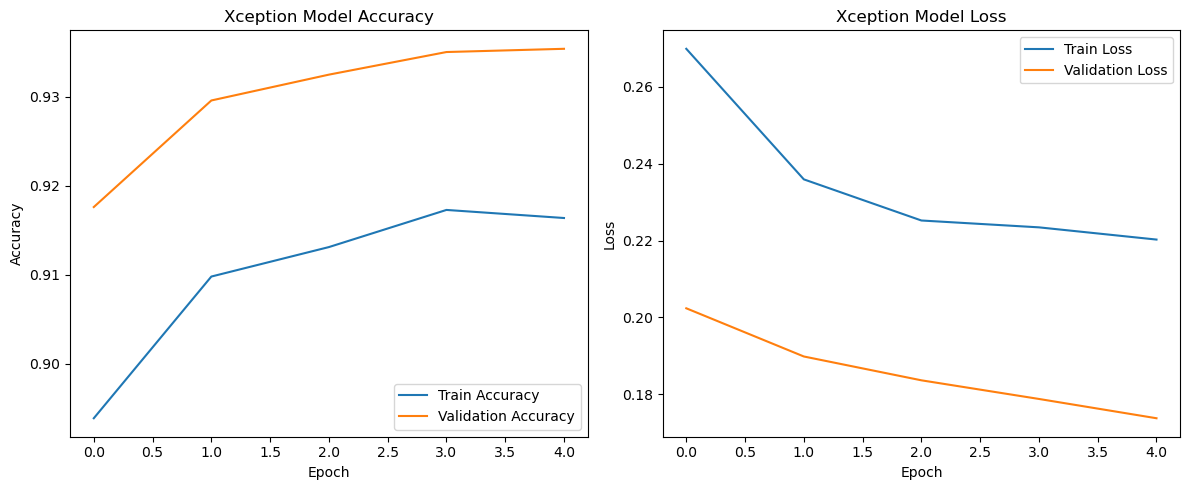

In [199]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Xception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [200]:
# Get predicted probabilities
pred_probabilities = xception_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1400
           1       0.90      0.97      0.93      1356

    accuracy                           0.93      2756
   macro avg       0.93      0.93      0.93      2756
weighted avg       0.94      0.93      0.93      2756



In [201]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[1259,  141],
       [  44, 1312]], dtype=int64)

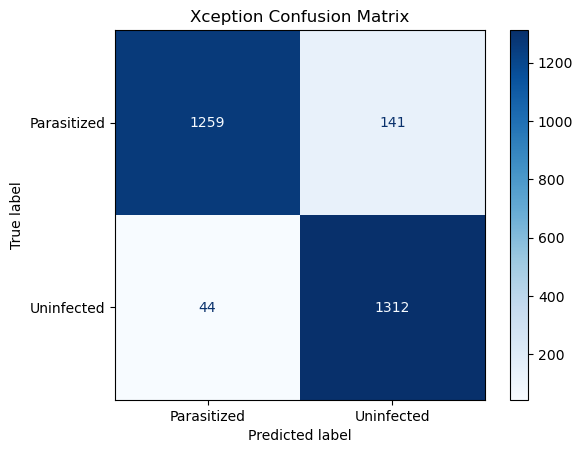

In [202]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Xception Confusion Matrix')
plt.show()

In [204]:
from tensorflow.keras.saving import save_model
save_model(xception_model, 'xception.h5')
save_model(xception_model, 'xception.keras')

87/87 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step


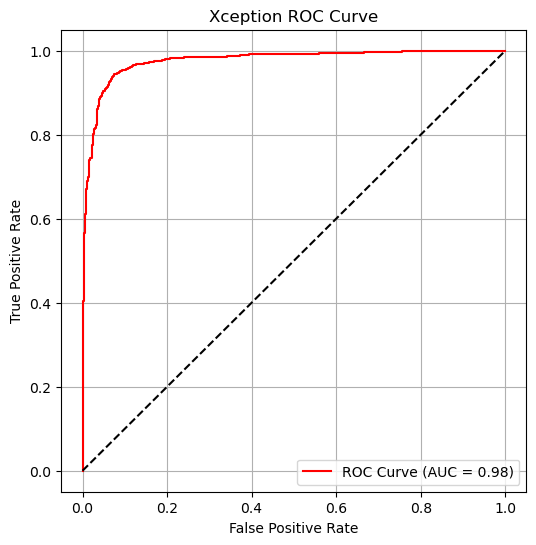

In [10]:
# Load pre-trained models
xception_model = load_model(r"C:\Users\kingk\Downloads\CNN\xception.h5")

# True labels
y_true = test_generator.classes 

y_predpred = xception_model.predict(test_generator)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Xception ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# DENSENET121

In [206]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

# Load the DenseNet121 model with pre-trained weights, excluding the top layers
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=image_size)

# Freeze the layers
densenet_base.trainable = False

# Add custom top layers
densenet_model = models.Sequential([
    densenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
densenet_model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,103,169 (27.10 MB)

 Trainable params: 65,665 (256.50 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [207]:
# Train the model
history = densenet_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1716s 2s/step - accuracy: 0.8506 - loss: 0.3406 - val_accuracy: 0.9274 - val_loss: 0.2091 - learning_rate: 0.0010
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1635s 2s/step - accuracy: 0.9199 - loss: 0.2204 - val_accuracy: 0.9242 - val_loss: 0.1845 - learning_rate: 0.0010
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1635s 2s/step - accuracy: 0.9212 - loss: 0.2093 - val_accuracy: 0.9351 - val_loss: 0.1721 - learning_rate: 0.0010
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1631s 2s/step - accuracy: 0.9233 - loss: 0.2126 - val_accuracy: 0.9387 - val_loss: 0.1691 - learning_rate: 0.0010
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1633s 2s/step - accuracy: 0.9294 - loss: 0.2030 - val_accuracy: 0.9329 - val_loss: 0.1749 - learning_rate: 0.0010


In [208]:
# Evaluate the model
test_loss, test_acc = densenet_model.evaluate(test_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9231 - loss: 0.2123


In [209]:
# Evaluate the model on the validation set
val_loss, val_acc = densenet_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9339 - loss: 0.1740


In [210]:
# Get predicted probabilities
pred_probabilities = densenet_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1400
           1       0.89      0.96      0.92      1356

    accuracy                           0.92      2756
   macro avg       0.92      0.92      0.92      2756
weighted avg       0.93      0.92      0.92      2756



In [211]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[1235,  165],
       [  50, 1306]], dtype=int64)

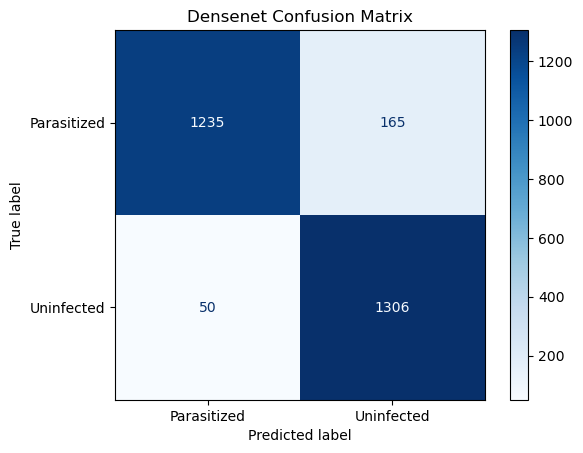

In [212]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Densenet Confusion Matrix')
plt.show()

In [214]:
from tensorflow.keras.saving import save_model
save_model(densenet_model, 'densenet.keras')
save_model(densenet_model,'densenet.h5')

87/87 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step


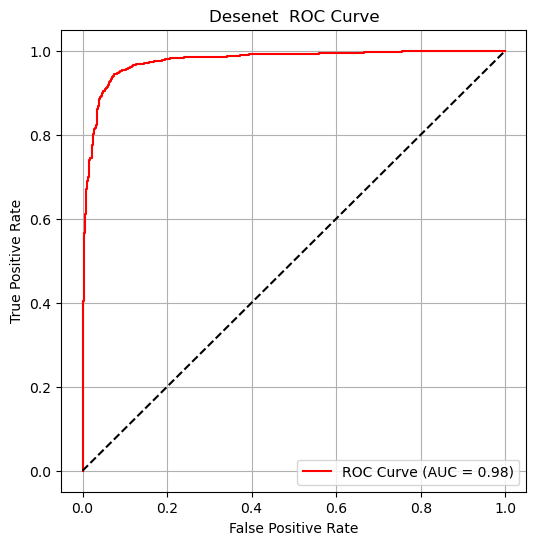

In [9]:
# Load pre-trained models
densenet_model = load_model(r"C:\Users\kingk\Downloads\CNN\densenet.h5")

# True labels
y_true = test_generator.classes 

y_pred = densenet_model.predict(test_generator)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Desenet  ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# VGG16

In [65]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model with pre-trained weights, excluding the top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=image_size)

# Freeze the layers
vgg16_base.trainable = False

# Add custom top layers
vgg16_model = models.Sequential([
    vgg16_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,747,585 (56.26 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = vgg16_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 9958s 14s/step - accuracy: 0.7125 - loss: 0.5656 - val_accuracy: 0.8886 - val_loss: 0.3335
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 9769s 14s/step - accuracy: 0.8599 - loss: 0.3399 - val_accuracy: 0.8948 - val_loss: 0.2675
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 6164s 9s/step - accuracy: 0.8869 - loss: 0.2879 - val_accuracy: 0.9144 - val_loss: 0.2352
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 5862s 9s/step - accuracy: 0.8908 - loss: 0.2702 - val_accuracy: 0.9002 - val_loss: 0.2653
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 7270s 11s/step - accuracy: 0.8957 - loss: 0.2614 - val_accuracy: 0.9216 - val_loss: 0.2169


In [67]:
# Evaluate the model
test_loss, test_acc = vgg16_model.evaluate(test_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 671s 8s/step - accuracy: 0.9079 - loss: 0.2395


In [68]:
# Evaluate the model on the validation set
val_loss, val_acc = vgg16_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 654s 8s/step - accuracy: 0.9267 - loss: 0.2178


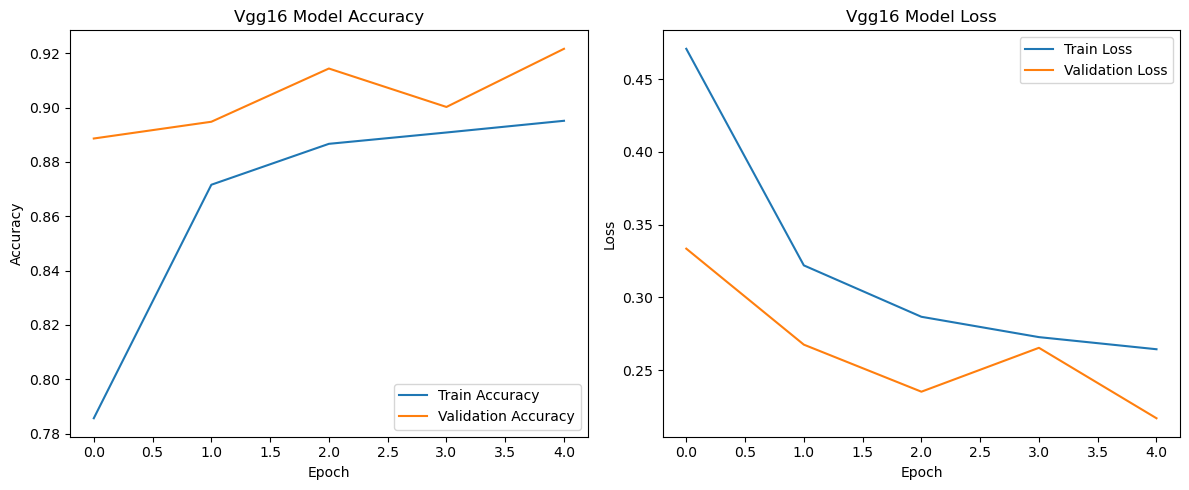

In [69]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Vgg16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Vgg16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [70]:
# Get predicted probabilities
pred_probabilities = vgg16_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 647s 7s/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1400
           1       0.88      0.95      0.91      1356

    accuracy                           0.91      2756
   macro avg       0.91      0.91      0.91      2756
weighted avg       0.92      0.91      0.91      2756



In [71]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[1223,  177],
       [  65, 1291]], dtype=int64)

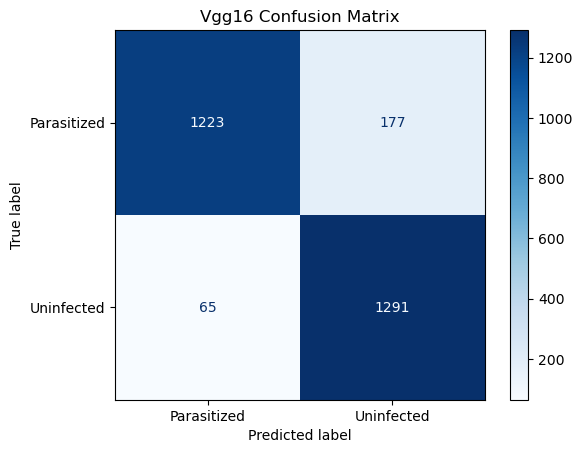

In [72]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Vgg16 Confusion Matrix')
plt.show()

In [74]:
save_model(vgg16_model, 'Vgg16.keras')
save_model(vgg16_model, 'Vgg16.h5')

87/87 ━━━━━━━━━━━━━━━━━━━━ 509s 6s/step


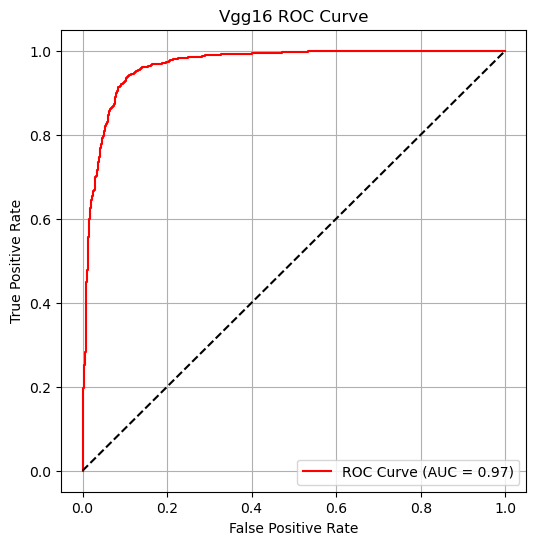

In [7]:
# Load pre-trained models
Vgg16_model= load_model(r"C:\Users\kingk\Downloads\CNN\Vgg16.h5")

# True labels
y_true = test_generator.classes 

y_pred = Vgg16_model.predict(test_generator)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Vgg16 ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# INCEPTIONV3

In [36]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load the InceptionV3 model with pre-trained weights, excluding the top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=image_size)

# Freeze the layers
inception_base.trainable = False

# Add custom top layers
inception_model = models.Sequential([
    inception_base,
    layers.GlobalAveragePooling2D(), 
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
inception_model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,933,985 (83.67 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [37]:
# Train the model
history = inception_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1335s 2s/step - accuracy: 0.8231 - loss: 0.4056 - val_accuracy: 0.9238 - val_loss: 0.1992 - learning_rate: 0.0010
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1324s 2s/step - accuracy: 0.8928 - loss: 0.2742 - val_accuracy: 0.9292 - val_loss: 0.1886 - learning_rate: 0.0010
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1341s 2s/step - accuracy: 0.8926 - loss: 0.2691 - val_accuracy: 0.9369 - val_loss: 0.1739 - learning_rate: 0.0010
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/step - accuracy: 0.9012 - loss: 0.2526 - val_accuracy: 0.9307 - val_loss: 0.1878 - learning_rate: 0.0010
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1412s 2s/step - accuracy: 0.9019 - loss: 0.2513 - val_accuracy: 0.9372 - val_loss: 0.1674 - learning_rate: 0.0010


In [38]:
# # Evaluate the performance of the model on the test set
test_loss, test_acc = inception_model.evaluate(test_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9248 - loss: 0.2043


In [39]:
# Evaluate the performance of the model on the validation set
val_loss, val_acc =inception_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9348 - loss: 0.1717


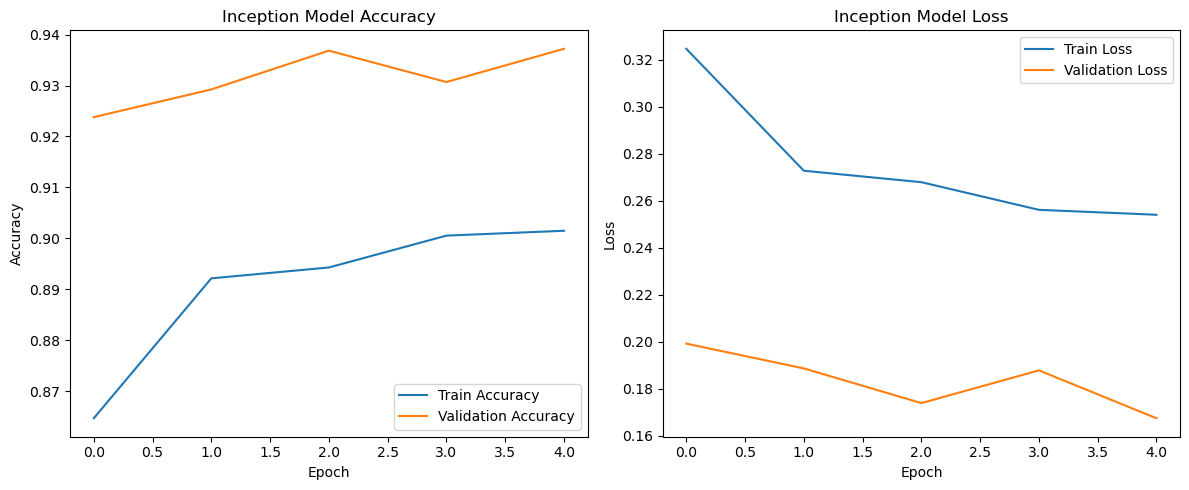

In [40]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Inception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Inception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Get predicted probabilities
pred_probabilities = inception_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1400
           1       0.91      0.95      0.93      1356

    accuracy                           0.93      2756
   macro avg       0.93      0.93      0.93      2756
weighted avg       0.93      0.93      0.93      2756



In [45]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[1267,  133],
       [  66, 1290]], dtype=int64)

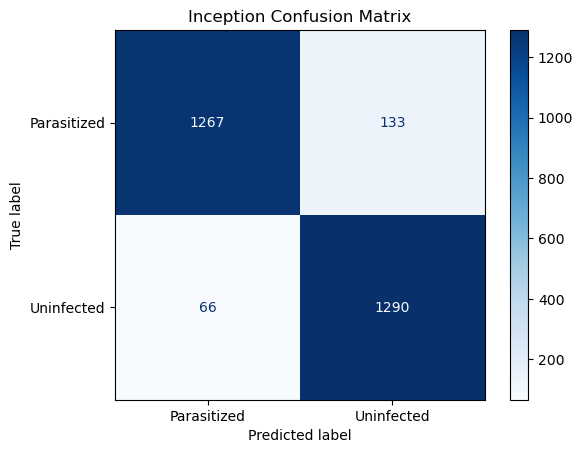

In [ ]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Inception Confusion Matrix')
plt.show()

In [48]:
from tensorflow.keras.saving import save_model
save_model(inception_model, 'InceptionV3.keras')
save_model(inception_model, 'InceptionV3.h5')

87/87 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step


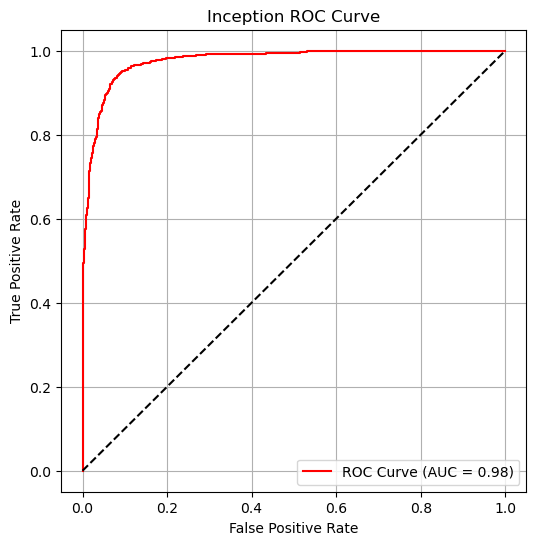

In [12]:
# Load pre-trained models
inception_model = load_model(r"C:\Users\kingk\Downloads\CNN\InceptionV3.h5")

# True labels
y_true = test_generator.classes 

y_pred = inception_model.predict(test_generator)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Inception ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# MobileNetV

In [47]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load the pretrained MobileNetV2 model
MobileNetV_base = MobileNetV2(input_shape=image_size, include_top=False, weights='imagenet')
MobileNetV_base.trainable = False  # Freeze base layers

# Define the model using Sequential
MobileNetV_model = models.Sequential([
    MobileNetV_base,               # Add the base MobileNetV2 model
    layers.GlobalAveragePooling2D(),              # Flatten the output
    layers.Dense(64, activation='relu'),  # Add a dense layer
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
MobileNetV_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary (optional)
MobileNetV_model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,033 (8.93 MB)

 Trainable params: 82,049 (320.50 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [48]:
history = MobileNetV_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 2641s 4s/step - accuracy: 0.8668 - loss: 0.3244 - val_accuracy: 0.9086 - val_loss: 0.2324
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 2209s 3s/step - accuracy: 0.9152 - loss: 0.2362 - val_accuracy: 0.9213 - val_loss: 0.2064
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1918s 3s/step - accuracy: 0.9165 - loss: 0.2265 - val_accuracy: 0.8890 - val_loss: 0.2760
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 1918s 3s/step - accuracy: 0.9192 - loss: 0.2227 - val_accuracy: 0.9220 - val_loss: 0.2088
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 2311s 3s/step - accuracy: 0.9171 - loss: 0.2216 - val_accuracy: 0.9271 - val_loss: 0.2009


In [49]:
# Evaluate the model
test_loss, test_acc = MobileNetV_model.evaluate(test_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9192 - loss: 0.2183


In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = MobileNetV_model.evaluate(val_generator)

87/87 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9332 - loss: 0.2005


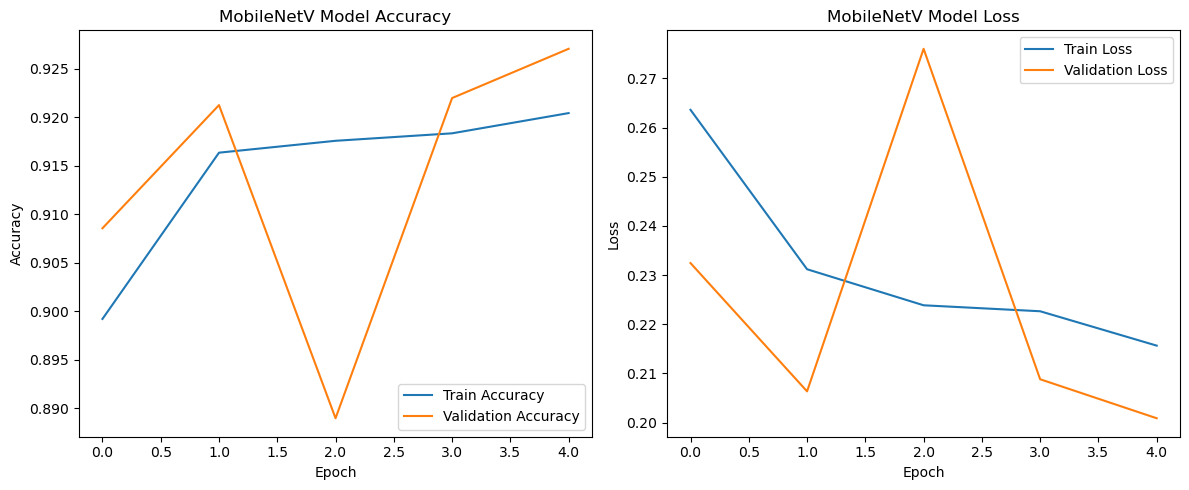

In [51]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [52]:
# Get predicted probabilities
pred_probabilities = MobileNetV_model.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1400
           1       0.91      0.92      0.91      1356

    accuracy                           0.92      2756
   macro avg       0.92      0.92      0.92      2756
weighted avg       0.92      0.92      0.92      2756



In [ ]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[1284,  116],
       [ 115, 1241]], dtype=int64)

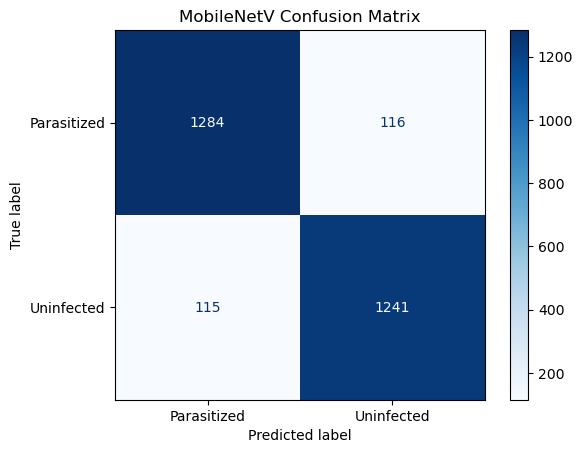

In [54]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('MobileNetV Confusion Matrix')
plt.show()

In [56]:
from tensorflow.keras.saving import save_model
save_model(MobileNetV_model, 'Mobilenetvmodel.keras')
save_model(MobileNetV_model, 'Mobilenetvmodel.h5')

87/87 ━━━━━━━━━━━━━━━━━━━━ 57s 627ms/step


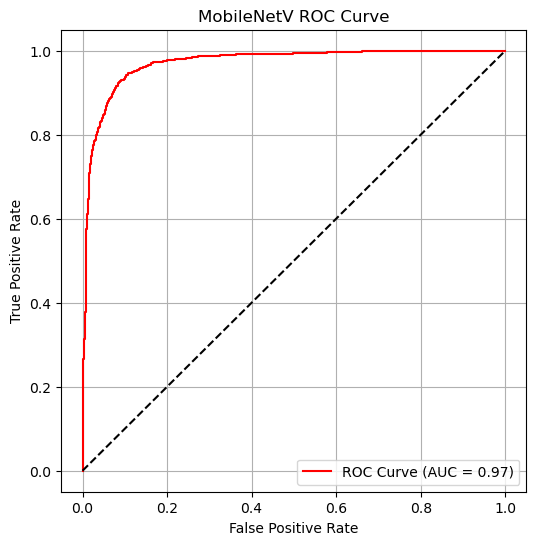

In [13]:
# Load pre-trained models
MobileNetV_model = load_model(r"C:\Users\kingk\Downloads\CNN\Mobilenetvmodel.h5")

# True labels
y_true = test_generator.classes 

y_pred = MobileNetV_model.predict(test_generator)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MobileNetV ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ENSEMBLE

STACKING ENSEMBLE METHOD

DX (DENSENET & XCEPTION)ENSEMBLE 

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step
DX Ensemble Model Accuracy: 0.9339622641509434
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1400
           1       0.90      0.97      0.94      1356

    accuracy                           0.93      2756
   macro avg       0.94      0.93      0.93      2756
weighted avg       0.94      0.93      0.93      2756

Confusion Matrix:
 [[1258  142]
 [  40 1316]]


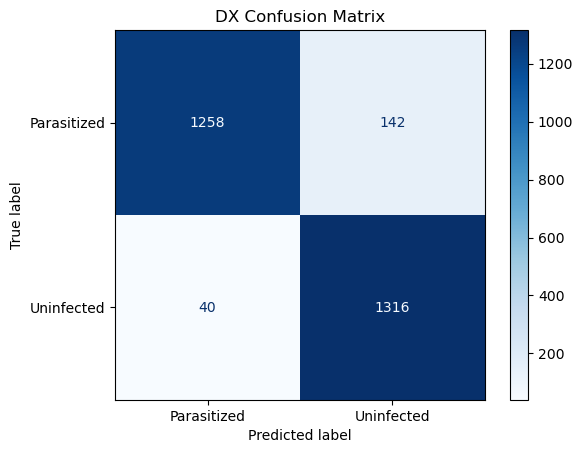

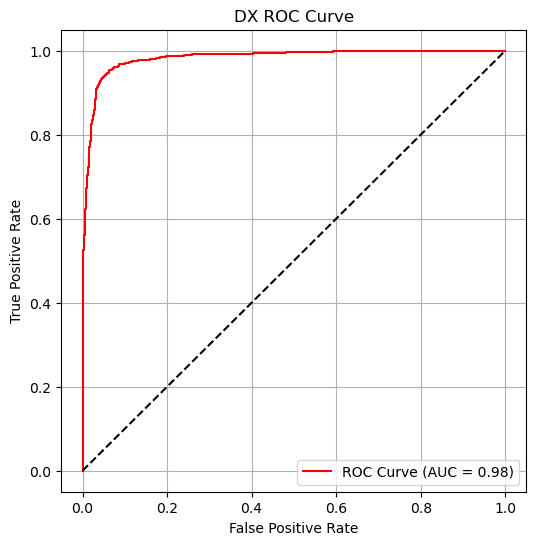

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
xception_model = load_model('xception.h5')
densenet_model = load_model('densenet.h5')

# Set all the models to non-trainable (freeze them)
for model in [xception_model, densenet_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
xception_output = xception_model(ensemble_input)
densenet_output = densenet_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([xception_output, densenet_output ])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('DX.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('DX.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("DX Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('DX Confusion Matrix')
plt.show()


y_pred_roc = average_probs
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DX ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


MI (MOBILENETV & INCEPTIONV3 MODEL) ENSEMBLE 

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step
MI Ensemble Model Accuracy: 0.9394049346879536
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1400
           1       0.93      0.95      0.94      1356

    accuracy                           0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756

Confusion Matrix:
 [[1298  102]
 [  65 1291]]


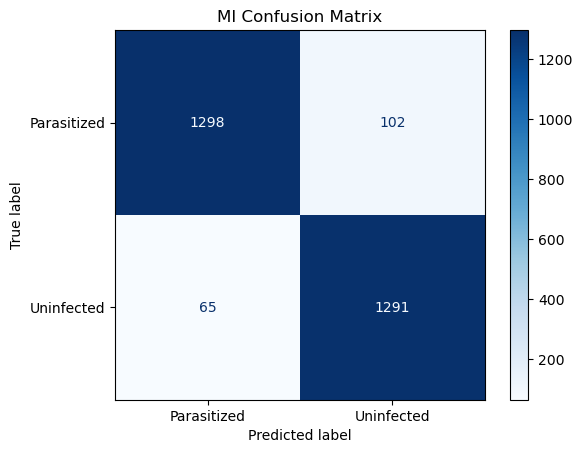

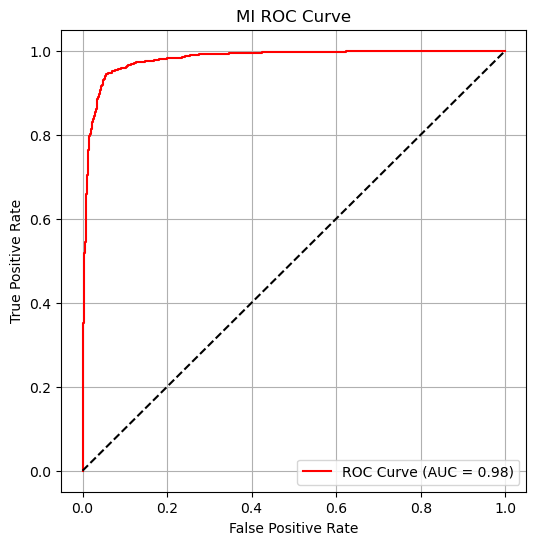

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
inception_model = load_model('InceptionV3.h5')
MobileNetV_model = load_model('Mobilenetvmodel.h5')

# Set all the models to non-trainable (freeze them)
for model in [inception_model, MobileNetV_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
inception_output = inception_model(ensemble_input)
MobileNetV_output = MobileNetV_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([inception_output, MobileNetV_output])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('MI.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('MI.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("MI Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('MI Confusion Matrix')
plt.show()

y_pred_roc = average_probs

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MI ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


SV (SIMPLE CNN & VGGG16 MODEL) ENSEMBLE 

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 569s 7s/step
SV Ensemble Model Accuracy: 0.9459361393323658
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1400
           1       0.92      0.98      0.95      1356

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756

Confusion Matrix:
 [[1281  119]
 [  30 1326]]


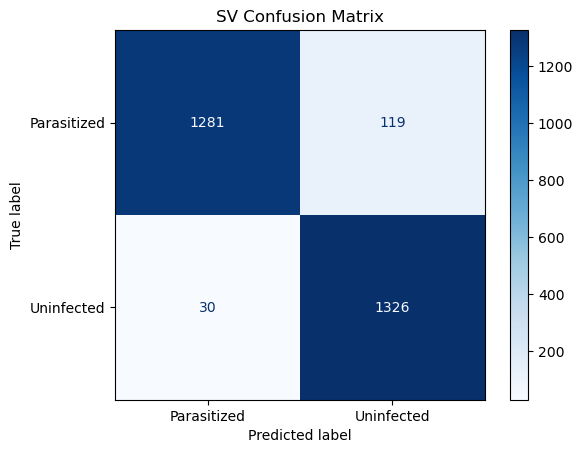

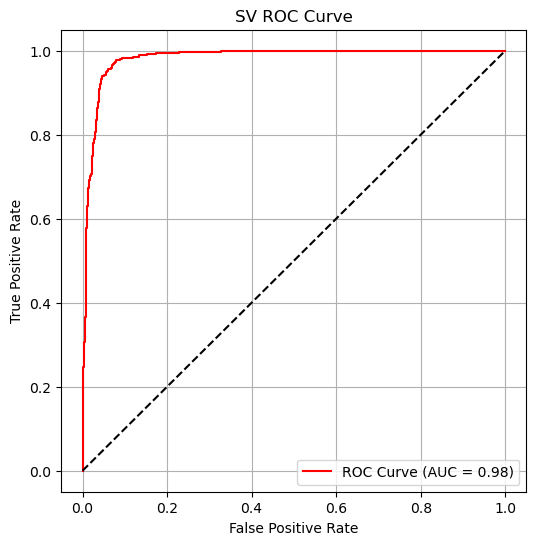

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
simple_cnn_model = load_model('Simple_cnn.h5')
Vgg16_model = load_model('Vgg16.h5')

# Set all the models to non-trainable (freeze them)
for model in [simple_cnn_model, Vgg16_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
simple_cnn_output = simple_cnn_model(ensemble_input)
Vgg16_output = Vgg16_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([simple_cnn_output, Vgg16_output])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('SV.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('SV.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("SV Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('SV Confusion Matrix')
plt.show()

y_pred_roc = average_probs
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SV ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


SDX (SIMPLE CNN, DENSENET, & XCEPTION)ENSEMBLE

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step
SDX Ensemble Model Accuracy: 0.9484760522496372
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1400
           1       0.92      0.98      0.95      1356

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756

Confusion Matrix:
 [[1291  109]
 [  33 1323]]


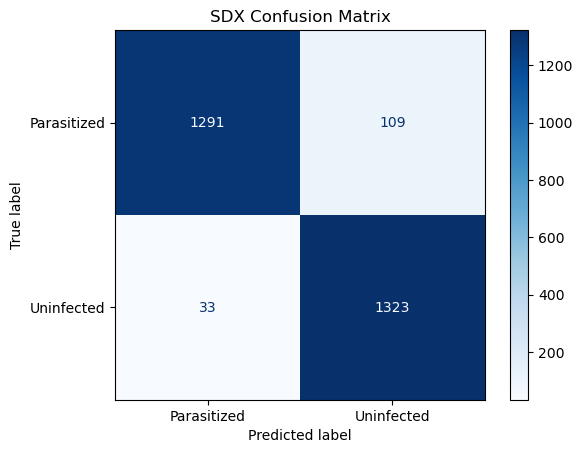

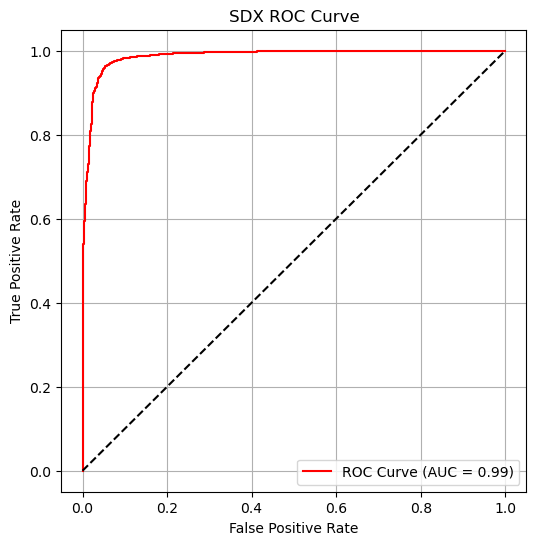

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
simple_cnn_model = load_model('Simple_cnn.h5')
xception_model = load_model('xception.h5')
densenet_model = load_model('densenet.h5')

# Set all the models to non-trainable (freeze them)
for model in [xception_model, densenet_model, simple_cnn_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
simple_cnn_output = simple_cnn_model(ensemble_input)
xception_output = xception_model(ensemble_input)
densenet_output = densenet_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([simple_cnn_output, xception_output, densenet_output ])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('SDX.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('SDX.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("SDX Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('SDX Confusion Matrix')
plt.show()

y_pred_roc = average_probs
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SDX ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

VMI (VGG16, MOBILENETV3 & INCEPTIONV3) ENSEMBLE

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 688s 8s/step
VMI Ensemble Model Accuracy: 0.9412191582002902
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1400
           1       0.93      0.96      0.94      1356

    accuracy                           0.94      2756
   macro avg       0.94      0.94      0.94      2756
weighted avg       0.94      0.94      0.94      2756

Confusion Matrix:
 [[1295  105]
 [  57 1299]]


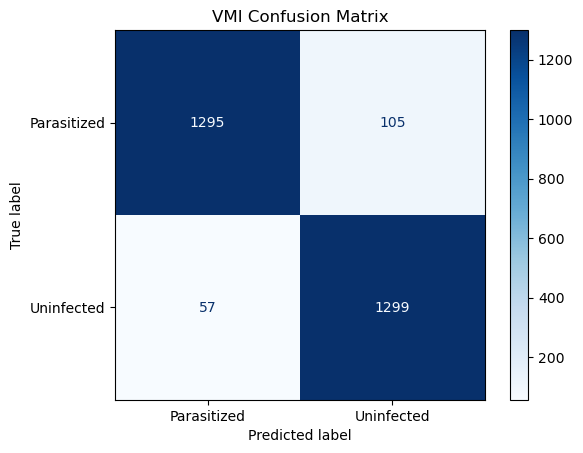

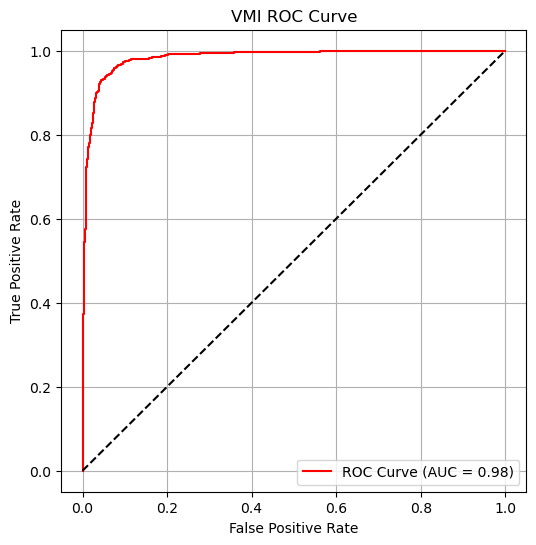

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
Vgg16_model = load_model('Vgg16.h5')
inception_model = load_model('InceptionV3.h5')
MobileNetV_model = load_model('Mobilenetvmodel.h5')

# Set all the models to non-trainable (freeze them)
for model in [Vgg16_model, inception_model, MobileNetV_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
Vgg16_output = Vgg16_model(ensemble_input)
inception_output = inception_model(ensemble_input)
MobileNetV_output = MobileNetV_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([ Vgg16_output, inception_output, MobileNetV_output])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('VMI.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('VMI.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("VMI Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('VMI Confusion Matrix')
plt.show()

y_pred_roc = average_probs
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VMI ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


MIXDSV ( MOBILENETV3, INCEPTIONV3, XCEPTION, DENSENET, SIMPLE CNN, & VGG16 ) ENSEMBLE

Found 2756 validated image filenames belonging to 2 classes.


87/87 ━━━━━━━━━━━━━━━━━━━━ 849s 10s/step
MIXDSV Ensemble Model Accuracy: 0.9477503628447025
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1400
           1       0.93      0.97      0.95      1356

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756

Confusion Matrix:
 [[1294  106]
 [  38 1318]]


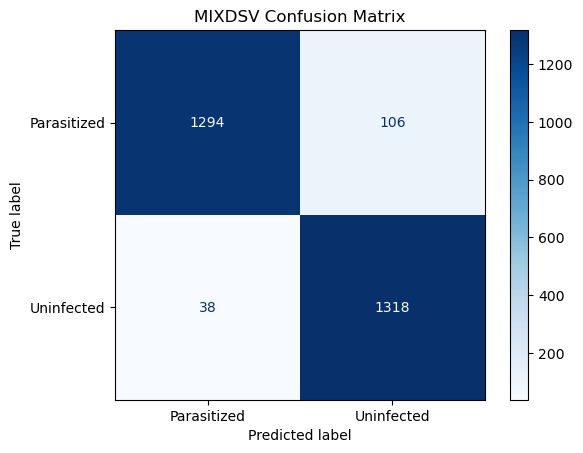

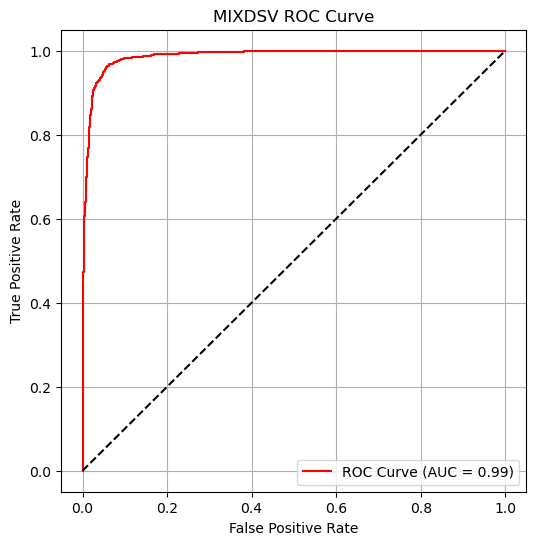

In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report

# Load pre-trained models
simple_cnn_model = load_model('Simple_cnn.h5')
Vgg16_model = load_model('Vgg16.h5')
inception_model = load_model('InceptionV3.h5')
MobileNetV_model = load_model('Mobilenetvmodel.h5')
xception_model = load_model('xception.h5')
densenet_model = load_model('densenet.h5')

# Set all the models to non-trainable (freeze them)
for model in [simple_cnn_model, Vgg16_model, inception_model, MobileNetV_model, xception_model, densenet_model]:
    model.trainable = False

# Define input layer that matches the input shape of the base models
input_shape = (224, 224, 3)
ensemble_input = Input(shape=input_shape)

# Get the outputs from each individual model
simple_cnn_output = simple_cnn_model(ensemble_input)
Vgg16_output = Vgg16_model(ensemble_input)
inception_output = inception_model(ensemble_input)
MobileNetV_output = MobileNetV_model(ensemble_input)
xception_output = xception_model(ensemble_input)
densenet_output = densenet_model(ensemble_input)

# Stack the outputs and take the average
average_output = Average()([simple_cnn_output, Vgg16_output, inception_output, MobileNetV_output, xception_output, densenet_output])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=average_output)

# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the ensemble model as an H5 file
ensemble_model.save('MIXDSV.h5')

# Define test generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load the saved ensemble model
loaded_ensemble_model = load_model('MIXDSV.h5')

# True labels
y_true = test_generator.classes  # Ground truth labels

# Model predictions
average_probs = loaded_ensemble_model.predict(test_generator)

# Convert probabilities to binary class predictions (threshold of 0.5)
y_pred = (average_probs > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("MIXDSV Ensemble Model Accuracy:", accuracy)

# Print classification report
print(classification_report(y_true, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_true,  y_pred)
print("Confusion Matrix:\n", cm)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('MIXDSV Confusion Matrix')
plt.show()

y_pred_roc = average_probs
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_roc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MIXDSV ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# RESULT EVALUATION 

In [1]:
import os
import pandas as pd
import numpy as np

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
from tabulate import tabulate

FORMULARS

​
 Accuracy = TP+TN/TP+TN+FP+FN

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2× (Precision+Recall/Precision×RecalI​)


- Class 0: Represents Parasitized (or positive) cases.
- Class 1: Represents Uninfected (or negative) cases.


COMPARING MODELS ( Vision Transformer & CNN Models)

Using Confusion Matrix  for Result Comparison

In [ ]:
# Original data for the DataFrame
data = {
    'Model': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'InceptionV3', 'MobileNetV2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV'],
    'True Positives (TP)': [1282, 1259, 1235, 1223, 1267, 1284, 1258, 1298, 1281, 1291, 1294, 1295],
    'False Positives (FP)': [118, 141, 165, 177, 133, 116, 142, 102, 119, 109, 106, 105],
    'False Negatives (FN)': [23, 44, 50, 65, 66, 115, 40, 65, 30, 33, 38, 57],
    'True Negatives (TN)': [1333, 1312, 1306, 1291, 1290, 1241, 1316, 1291, 1326, 1323, 1318, 1299],
    'Accuracy': ['95%', '93%', '92%', '91%', '93%', '92%', '93%', '94%', '95%', '95%', '94%','95%'],
    'Precision (Parasitized)': ['98%', '97%', '96%', '95%', '95%', '92%', '97%', '95%', '98%', '98%', '96%', '97%'],
    'Precision (Uninfected)': ['92%', '90%', '89%', '88%', '91%', '91%', '90%', '93%', '92%', '92%', '93%','93%'],   
    'Recall (Parasitized)': ['92%', '90%', '88%', '87%', '91%', '92%', '90%', '93%', '92%', '92%', '93%', '92%'],
    'Recall (Uninfected)': ['98%', '97%', '96', '95%', '95%', '92%', '97%', '95%', '98%', '98%', '96%', '97%'],
    'F1 Score (Parasitized)': ['95%', '93%', '92%', '91%', '93%', '92%', '93%', '94%', '95%', '95%', '94%','95%' ],
    'F1 Score (Uninfected)': ['95%', '93%', '92%', '91%', '93%', '91%', '94%', '94%', '95%', '95%', '94%','95%' ]
    
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Sorting by 'Accuracy' column in descending order
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype('float')
sorted_df = df.sort_values(by='Accuracy', ascending=False)

# Displaying the sorted DataFrame in tabular format using tabulate
print("CNN Model Confusion Matrix\n")
print(tabulate(sorted_df, headers='keys', tablefmt='pretty'))

CNN Model Confusion Matrix

+----+-------------+---------------------+----------------------+----------------------+---------------------+----------+-------------------------+------------------------+----------------------+---------------------+------------------------+-----------------------+
|    |    Model    | True Positives (TP) | False Positives (FP) | False Negatives (FN) | True Negatives (TN) | Accuracy | Precision (Parasitized) | Precision (Uninfected) | Recall (Parasitized) | Recall (Uninfected) | F1 Score (Parasitized) | F1 Score (Uninfected) |
+----+-------------+---------------------+----------------------+----------------------+---------------------+----------+-------------------------+------------------------+----------------------+---------------------+------------------------+-----------------------+
| 0  | Simple_CNN  |        1282         |         118          |          23          |        1333         |   95.0   |           98%           |          92%           

In [18]:
data = {
    'Model': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'InceptionV3', 'MobileNetV2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV'],
    'True Positives (TP)': [1282, 1259, 1235, 1223, 1267, 1284, 1258, 1298, 1281, 1291, 1294, 1295],
    'False Positives (FP)': [118, 141, 165, 177, 133, 116, 142, 102, 119, 109, 106, 105],
    'False Negatives (FN)': [23, 44, 50, 65, 66, 115, 40, 65, 30, 33, 38, 57],
    'True Negatives (TN)': [1333, 1312, 1306, 1291, 1290, 1241, 1316, 1291, 1326, 1323, 1318, 1299],
    }

# Creating the DataFrame
df = pd.DataFrame(data)

# Sorting by 'Accuracy' column in descending order

df['True Positives (TP)'] = df['True Positives (TP)'].astype(str).str.rstrip('%').astype(float)

# Sorting the DataFrame by the 'True Positives (TP)' column in descending order
sorted_df = df.sort_values(by='True Positives (TP)', ascending=False)

# Displaying the sorted DataFrame in tabular format using tabulate
print("CNN Model Confusion Matrix\n")
print(tabulate(sorted_df, headers='keys', tablefmt='pretty'))

CNN Model Confusion Matrix

+----+-------------+---------------------+----------------------+----------------------+---------------------+
|    |    Model    | True Positives (TP) | False Positives (FP) | False Negatives (FN) | True Negatives (TN) |
+----+-------------+---------------------+----------------------+----------------------+---------------------+
| 7  |     MI      |       1298.0        |         102          |          65          |        1291         |
| 11 |   MIXDSV    |       1295.0        |         105          |          57          |        1299         |
| 10 |     VMI     |       1294.0        |         106          |          38          |        1318         |
| 9  |     SDX     |       1291.0        |         109          |          33          |        1323         |
| 5  | MobileNetV2 |       1284.0        |         116          |         115          |        1241         |
| 0  | Simple_CNN  |       1282.0        |         118          |          23       

C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\10368499.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\10368499.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\10368499.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\10368499.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(models, rotation=

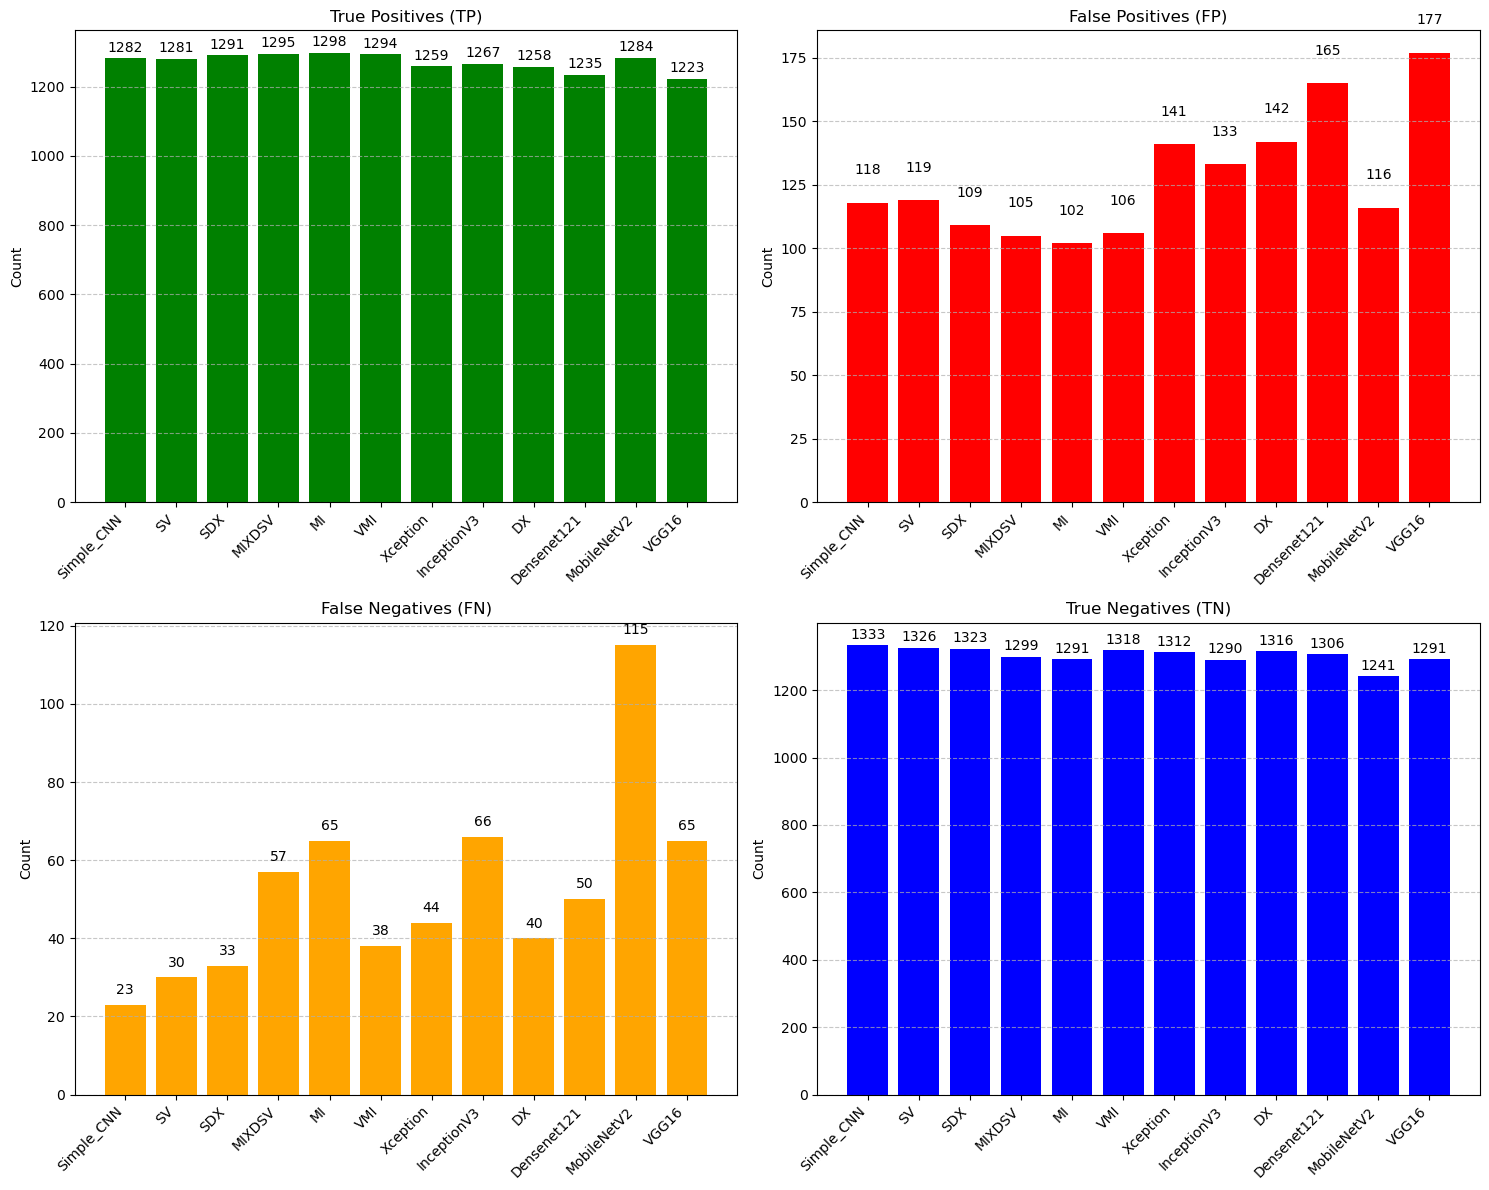

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data for Confusion Matrix
models = ["Simple_CNN", "SV", "SDX", "MIXDSV", "MI", "VMI", "Xception", "InceptionV3", "DX", "Densenet121", "MobileNetV2", "VGG16"]
true_positives = [1282, 1281, 1291, 1295, 1298, 1294, 1259, 1267, 1258, 1235, 1284, 1223]
false_positives = [118, 119, 109, 105, 102, 106, 141, 133, 142, 165, 116, 177]
false_negatives = [23, 30, 33, 57, 65, 38, 44, 66, 40, 50, 115, 65]
true_negatives = [1333, 1326, 1323, 1299, 1291, 1318, 1312, 1290, 1316, 1306, 1241, 1291]

# Creating a DataFrame for easier visualization
confusion_matrix_df = pd.DataFrame({
    "Model": models,
    "True Positives (TP)": true_positives,
    "False Positives (FP)": false_positives,
    "False Negatives (FN)": false_negatives,
    "True Negatives (TN)": true_negatives
})

# Plotting confusion matrix components for each model
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# True Positives
ax[0, 0].bar(models, true_positives, color='green')
ax[0, 0].set_title('True Positives (TP)')
ax[0, 0].set_xticklabels(models, rotation=45, ha="right")
ax[0, 0].set_ylabel('Count')
ax[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(true_positives):
    ax[0, 0].text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

# False Positives
ax[0, 1].bar(models, false_positives, color='red')
ax[0, 1].set_title('False Positives (FP)')
ax[0, 1].set_xticklabels(models, rotation=45, ha="right")
ax[0, 1].set_ylabel('Count')
ax[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(false_positives):
    ax[0, 1].text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

# False Negatives
ax[1, 0].bar(models, false_negatives, color='orange')
ax[1, 0].set_title('False Negatives (FN)')
ax[1, 0].set_xticklabels(models, rotation=45, ha="right")
ax[1, 0].set_ylabel('Count')
ax[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(false_negatives):
    ax[1, 0].text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

# True Negatives
ax[1, 1].bar(models, true_negatives, color='blue')
ax[1, 1].set_title('True Negatives (TN)')
ax[1, 1].set_xticklabels(models, rotation=45, ha="right")
ax[1, 1].set_ylabel('Count')
ax[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(true_negatives):
    ax[1, 1].text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
data = {
    'Model': ['ViT', 'DeiT'],
    'True Positives (TP)': [294, 293],
    'False Positives (FP)': [9, 5],
    'False Negatives (FN)': [16, 17],
    'True Negatives (TN)': [301, 305],
    'Accuracy': ['96%', '96%'],
    'Precision (Parasitized)': ['95%', '95%'],
    'Precision (Uninfected)': ['97%', '98%'],   
    'Recall (Parasitized)': ['97%', '95%'],
    'Recall (Uninfected)': ['95%', '98%'],
    'F1 Score (Parasitized)': ['96%', '97%'],
    'F1 Score (Uninfected)': ['96%', '96%' ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Sorting by 'Accuracy' column in descending order
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype('float')
sorted_df = df.sort_values(by='Accuracy', ascending=False)

# Displaying the sorted DataFrame in tabular format using tabulate
print("Transformer Model Confusion Matrix\n")
print(tabulate(sorted_df, headers='keys', tablefmt='pretty'))

Transformer Model Confusion Matrix

+---+-------+---------------------+----------------------+----------------------+---------------------+----------+-------------------------+------------------------+----------------------+---------------------+------------------------+-----------------------+
|   | Model | True Positives (TP) | False Positives (FP) | False Negatives (FN) | True Negatives (TN) | Accuracy | Precision (Parasitized) | Precision (Uninfected) | Recall (Parasitized) | Recall (Uninfected) | F1 Score (Parasitized) | F1 Score (Uninfected) |
+---+-------+---------------------+----------------------+----------------------+---------------------+----------+-------------------------+------------------------+----------------------+---------------------+------------------------+-----------------------+
| 0 |  ViT  |         294         |          9           |          16          |         301         |   96.0   |           95%           |          97%           |         97%       

In [ ]:
data = {
    'Model': ['ViT', 'DeiT'],
    'True Positives (TP)': [294, 293],
    'False Positives (FP)': [9, 5],
    'False Negatives (FN)': [16, 17],
    'True Negatives (TN)': [301, 305],
    }

# Creating the DataFrame
df = pd.DataFrame(data)

df['True Positives (TP)'] = df['True Positives (TP)'].astype(str).str.rstrip('%').astype(float)

# Sorting the DataFrame by the 'True Positives (TP)' column in descending order
sorted_df = df.sort_values(by='True Positives (TP)', ascending=False)

# Displaying the sorted DataFrame in tabular format using tabulate
print("Transformer Model Confusion Matrix\n")
print(tabulate(sorted_df, headers='keys', tablefmt='pretty'))

Transformer Model Confusion Matrix

+---+-------+---------------------+----------------------+----------------------+---------------------+
|   | Model | True Positives (TP) | False Positives (FP) | False Negatives (FN) | True Negatives (TN) |
+---+-------+---------------------+----------------------+----------------------+---------------------+
| 0 |  ViT  |        294.0        |          9           |          16          |         301         |
| 1 | DeiT  |        293.0        |          5           |          17          |         305         |
+---+-------+---------------------+----------------------+----------------------+---------------------+


C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\1082151163.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\1082151163.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\1082151163.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_21556\1082151163.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(models, r

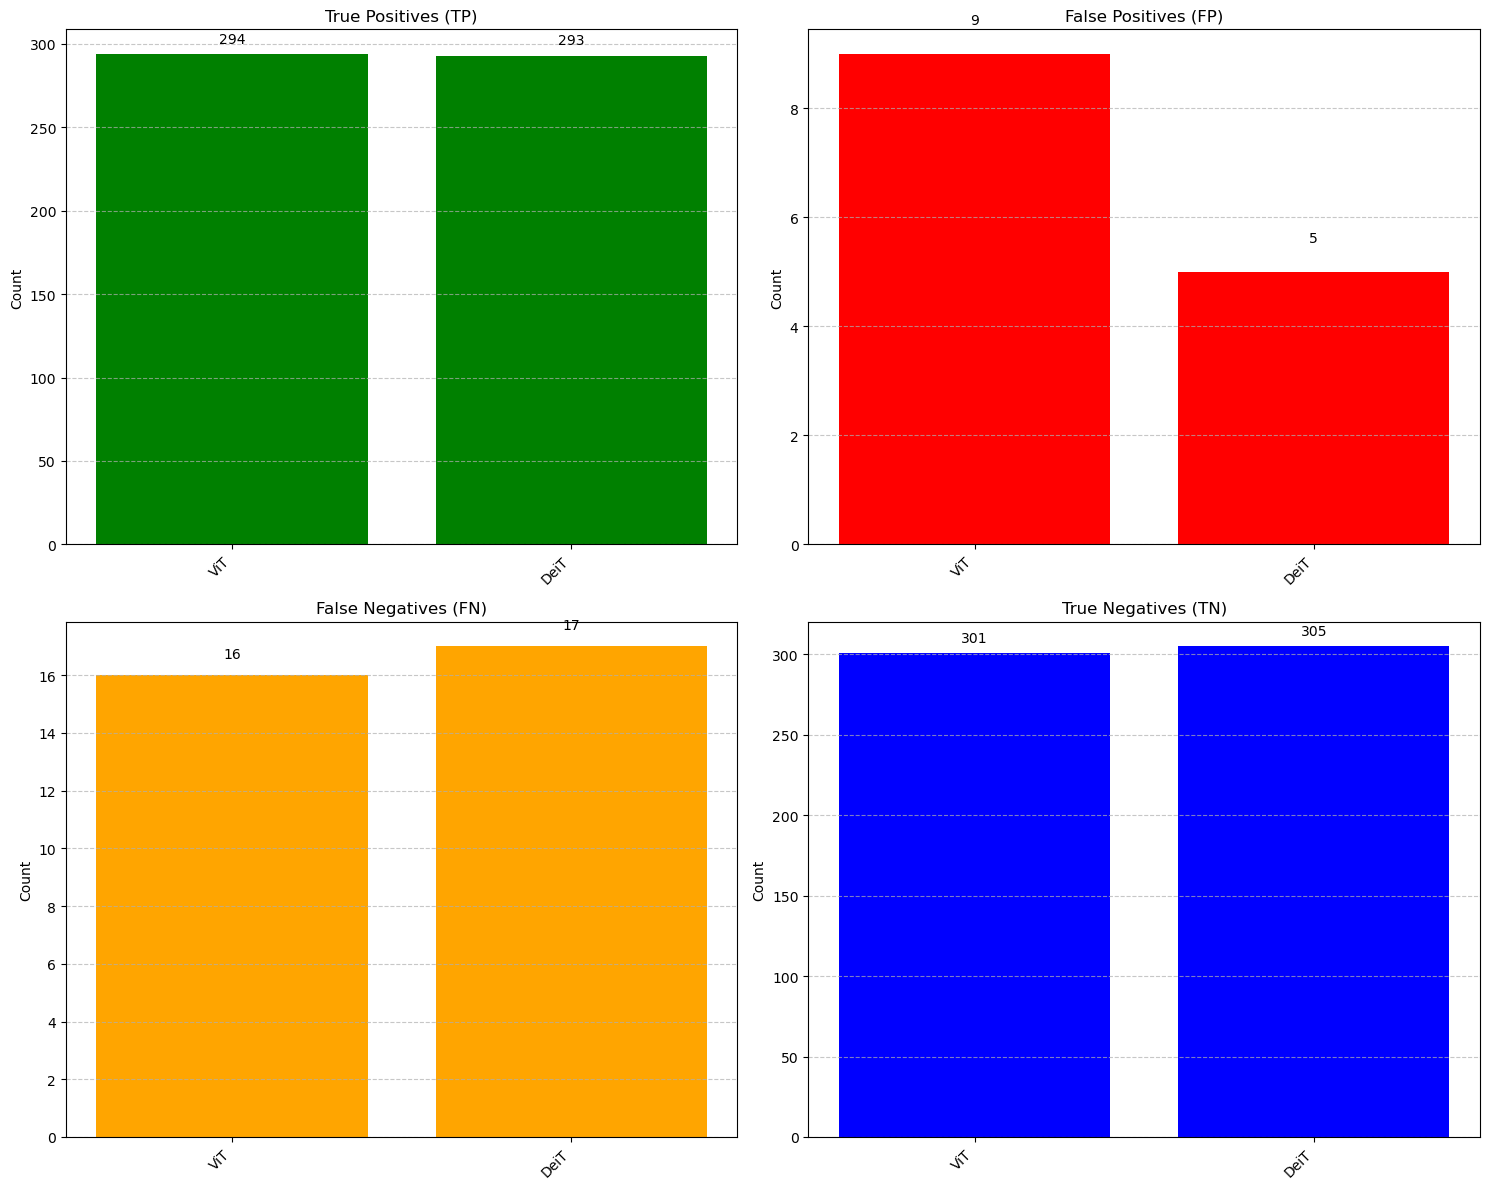

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data for Confusion Matrix
models = ['ViT', 'DeiT']
true_positives = [294, 293]
false_positives = [9, 5]
false_negatives = [16, 17]
true_negatives = [301, 305]

# Creating a DataFrame for easier visualization
confusion_matrix_df = pd.DataFrame({
    "Model": models,
    "True Positives (TP)": true_positives,
    "False Positives (FP)": false_positives,
    "False Negatives (FN)": false_negatives,
    "True Negatives (TN)": true_negatives
})

# Plotting confusion matrix components for each model
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# True Positives
ax[0, 0].bar(models, true_positives, color='green')
ax[0, 0].set_title('True Positives (TP)')
ax[0, 0].set_xticklabels(models, rotation=45, ha="right")
ax[0, 0].set_ylabel('Count')
ax[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(true_positives):
    ax[0, 0].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# False Positives
ax[0, 1].bar(models, false_positives, color='red')
ax[0, 1].set_title('False Positives (FP)')
ax[0, 1].set_xticklabels(models, rotation=45, ha="right")
ax[0, 1].set_ylabel('Count')
ax[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(false_positives):
    ax[0, 1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# False Negatives
ax[1, 0].bar(models, false_negatives, color='orange')
ax[1, 0].set_title('False Negatives (FN)')
ax[1, 0].set_xticklabels(models, rotation=45, ha="right")
ax[1, 0].set_ylabel('Count')
ax[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(false_negatives):
    ax[1, 0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

# True Negatives
ax[1, 1].bar(models, true_negatives, color='blue')
ax[1, 1].set_title('True Negatives (TN)')
ax[1, 1].set_xticklabels(models, rotation=45, ha="right")
ax[1, 1].set_ylabel('Count')
ax[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(true_negatives):
    ax[1, 1].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Comparison of Model Accuracy 

In [21]:
# Original data for the DataFrame
data = {
    'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 
               'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],
    'Accuracy': [0.95, 0.93, 0.92, 0.91, 0.93, 0.92, 0.93, 0.94, 0.95, 0.95, 0.94, 0.95, 0.96, 0.96]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Sorting by 'Accuracy' column in descending order
sorted_df = df.sort_values(by='Accuracy', ascending=False)

# Displaying the sorted DataFrame in tabular format using tabulate
print("Model Accuracy\n")
print(tabulate(sorted_df, headers='keys', tablefmt='pretty'))


Model Accuracy

+----+-------------+----------+
|    |   Models    | Accuracy |
+----+-------------+----------+
| 12 |     ViT     |   0.96   |
| 13 |    DeiT     |   0.96   |
| 0  | Simple_CNN  |   0.95   |
| 8  |     SV      |   0.95   |
| 9  |     SDX     |   0.95   |
| 11 |   MIXDSV    |   0.95   |
| 7  |     MI      |   0.94   |
| 10 |     VMI     |   0.94   |
| 1  |  Xception   |   0.93   |
| 4  | INCEPTIONV3 |   0.93   |
| 6  |     DX      |   0.93   |
| 2  | Densenet121 |   0.92   |
| 5  | Mobilenetv2 |   0.92   |
| 3  |    VGG16    |   0.91   |
+----+-------------+----------+


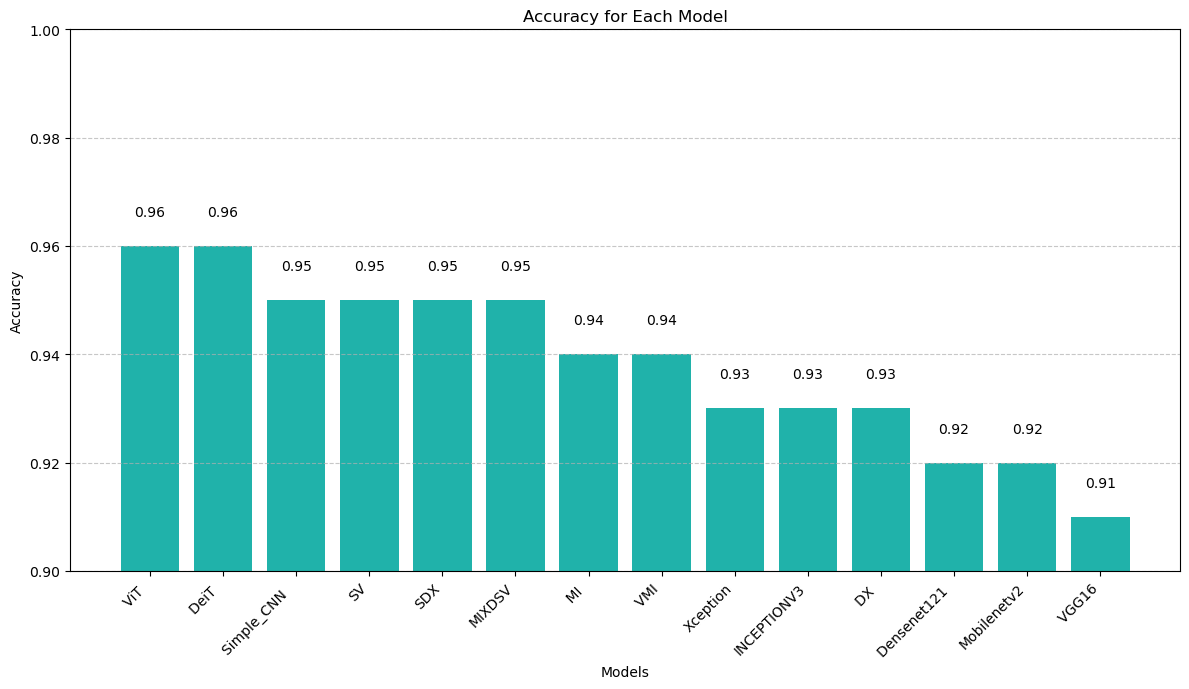

In [63]:
# Data for Accuracy
accuracy_data = [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.93, 0.92, 0.92, 0.91]
models = [' ViT ', 'DeiT ', 'Simple_CNN  ', 'SV', 'SDX', 'MIXDSV', ' MI ', ' VMI', 'Xception', 'INCEPTIONV3', 'DX ', 'Densenet121 ', 'Mobilenetv2', ' VGG16']

# Plotting the Accuracy for each model
plt.figure(figsize=(12, 7))
bars = plt.bar(models, accuracy_data, color='lightseagreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
# Customizations
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Model')
plt.xticks(rotation=45, ha="right")
plt.ylim([0.9, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



F1 Comparison

In [ ]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV','ViT','DeiT'],
'F1 Score (Parasitized)': [0.95, 0.93, 0.92, 0.91, 0.93, 0.92, 0.93, 0.94, 0.95, 0.95, 0.94, 0.95, 0.96, 0.97 ],
   
}



df = pd.DataFrame(data)
# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame 
sorted_results = results_df.sort_values(by=['F1 Score (Parasitized)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame
print("Model F1 Parasitized\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))

Model F1 Parasitized

+----+-------------+------------------------+
|    |   Models    | F1 Score (Parasitized) |
+----+-------------+------------------------+
| 0  |    DeiT     |          0.97          |
| 1  |     ViT     |          0.96          |
| 2  | Simple_CNN  |          0.95          |
| 3  |     SV      |          0.95          |
| 4  |     SDX     |          0.95          |
| 5  |   MIXDSV    |          0.95          |
| 6  |     MI      |          0.94          |
| 7  |     VMI     |          0.94          |
| 8  |  Xception   |          0.93          |
| 9  | INCEPTIONV3 |          0.93          |
| 10 |     DX      |          0.93          |
| 11 | Densenet121 |          0.92          |
| 12 | Mobilenetv2 |          0.92          |
| 13 |    VGG16    |          0.91          |
+----+-------------+------------------------+


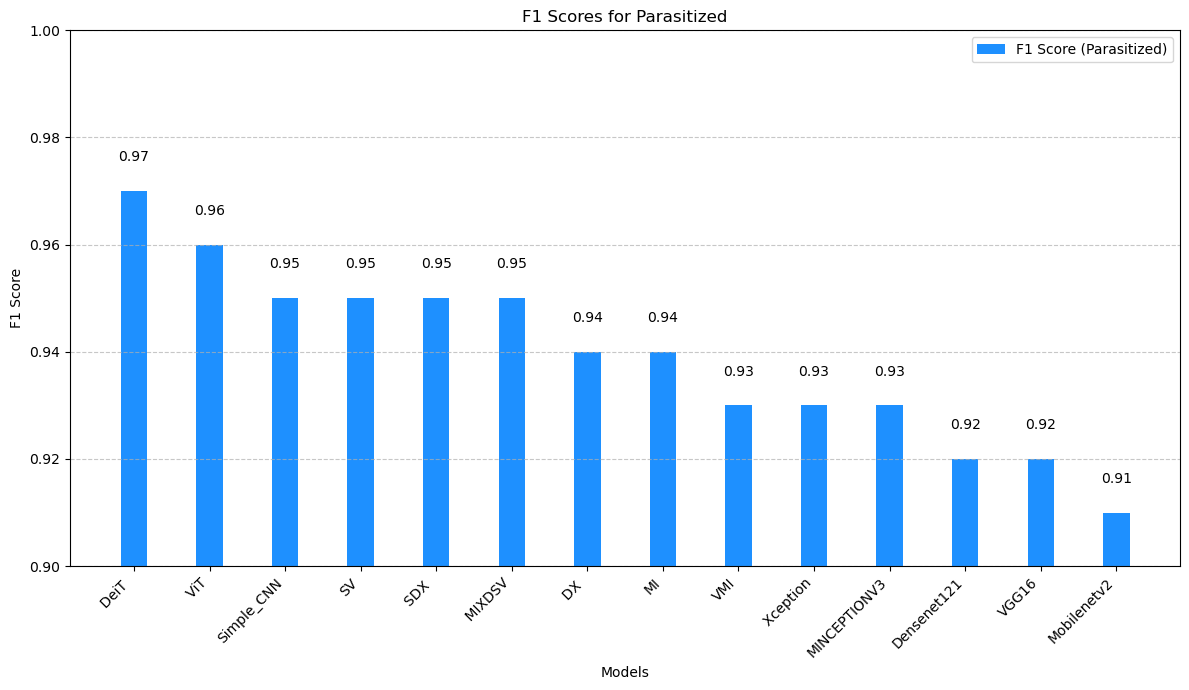

In [ ]:
# Data for F1 Scores
f1_parasitized_data = [0.97, 0.96, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.93, 0.92, 0.92, 0.91]
models = [' DeiT ',' ViT', 'Simple_CNN', 'SV', 'SDX ', ' MIXDSV', ' DX ', 'MI', 'VMI', ' Xception', 'MINCEPTIONV3', 'Densenet121', 'VGG16', 'Mobilenetv2']

# Define x positions for the bars and width of the bars
x = np.arange(len(f1_parasitized_data))
width = 0.35  # Width of the bars

# Plotting the F1-scores for each model
plt.figure(figsize=(12, 7))
bars = plt.bar(x,f1_parasitized_data, width, label='F1 Score (Parasitized)', color='dodgerblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customizations
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Parasitized')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.9, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],
'F1 Score (Uninfected)': [0.95, 0.93, 0.92, 0.91, 0.93, 0.91, 0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.96, 0.96 ],
   
}



df = pd.DataFrame(data)
# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame 
sorted_results = results_df.sort_values(by=['F1 Score (Uninfected)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame
print("Model F1 Uninfected\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))

Model F1 Uninfected

+----+-------------+-----------------------+
|    |   Models    | F1 Score (Uninfected) |
+----+-------------+-----------------------+
| 0  |     ViT     |         0.96          |
| 1  |    DeiT     |         0.96          |
| 2  | Simple_CNN  |         0.95          |
| 3  |     SV      |         0.95          |
| 4  |     SDX     |         0.95          |
| 5  |   MIXDSV    |         0.95          |
| 6  |     DX      |         0.94          |
| 7  |     MI      |         0.94          |
| 8  |     VMI     |         0.94          |
| 9  |  Xception   |         0.93          |
| 10 | INCEPTIONV3 |         0.93          |
| 11 | Densenet121 |         0.92          |
| 12 |    VGG16    |         0.91          |
| 13 | Mobilenetv2 |         0.91          |
+----+-------------+-----------------------+


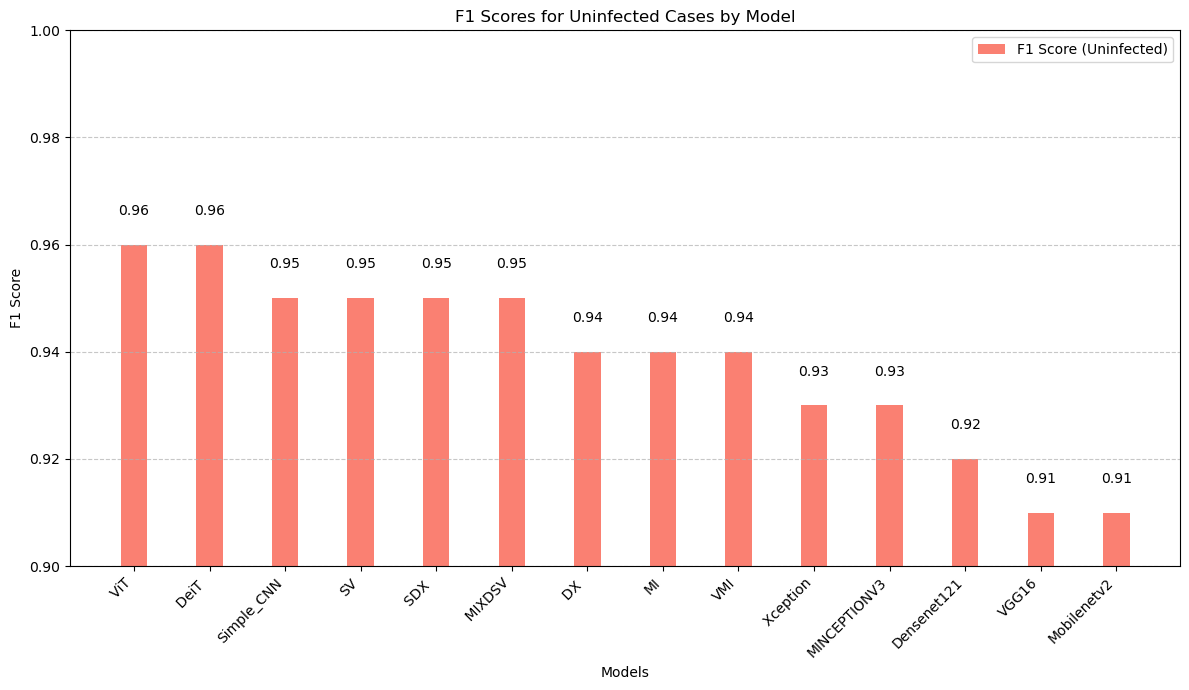

In [61]:
# Data for F1 Scores
f1_uninfected_data = [0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.93, 0.93, 0.92, 0.91, 0.91]
models = [' ViT', ' DeiT ', 'Simple_CNN', 'SV', 'SDX ', ' MIXDSV', ' DX ', 'MI', 'VMI', ' Xception', 'MINCEPTIONV3', 'Densenet121', 'VGG16', 'Mobilenetv2']

# Define x positions for the bars and width of the bars
x = np.arange(len(f1_uninfected_data))
width = 0.35  # Width of the bars

# Plotting the F1-scores for each model
plt.figure(figsize=(12, 7))
bars = plt.bar(x,f1_uninfected_data, width, label='F1 Score (Uninfected)', color='salmon')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)


# Customizations
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Uninfected Cases by Model')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.9, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Precision Comparism

In [37]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV','ViT', 'DeiT'],

'Precision (Parasitized)': [0.98, 0.97, 0.96, 0.95, 0.95, 0.92, 0.97, 0.95, 0.98, 0.98, 0.96, 0.97, 0.95, 0.95],
}

df = pd.DataFrame(data)

# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame by 'Accuracy Score' and 'Val_Accuracy'
sorted_results = results_df.sort_values(by=['Precision (Parasitized)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame
print("Model Precision Parasitized\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))

Model Precision Parasitized

+----+-------------+-------------------------+
|    |   Models    | Precision (Parasitized) |
+----+-------------+-------------------------+
| 0  | Simple_CNN  |          0.98           |
| 1  |     SV      |          0.98           |
| 2  |     SDX     |          0.98           |
| 3  |  Xception   |          0.97           |
| 4  |     DX      |          0.97           |
| 5  |   MIXDSV    |          0.97           |
| 6  | Densenet121 |          0.96           |
| 7  |     VMI     |          0.96           |
| 8  |    VGG16    |          0.95           |
| 9  | INCEPTIONV3 |          0.95           |
| 10 |     MI      |          0.95           |
| 11 |     ViT     |          0.95           |
| 12 |    DeiT     |          0.95           |
| 13 | Mobilenetv2 |          0.92           |
+----+-------------+-------------------------+


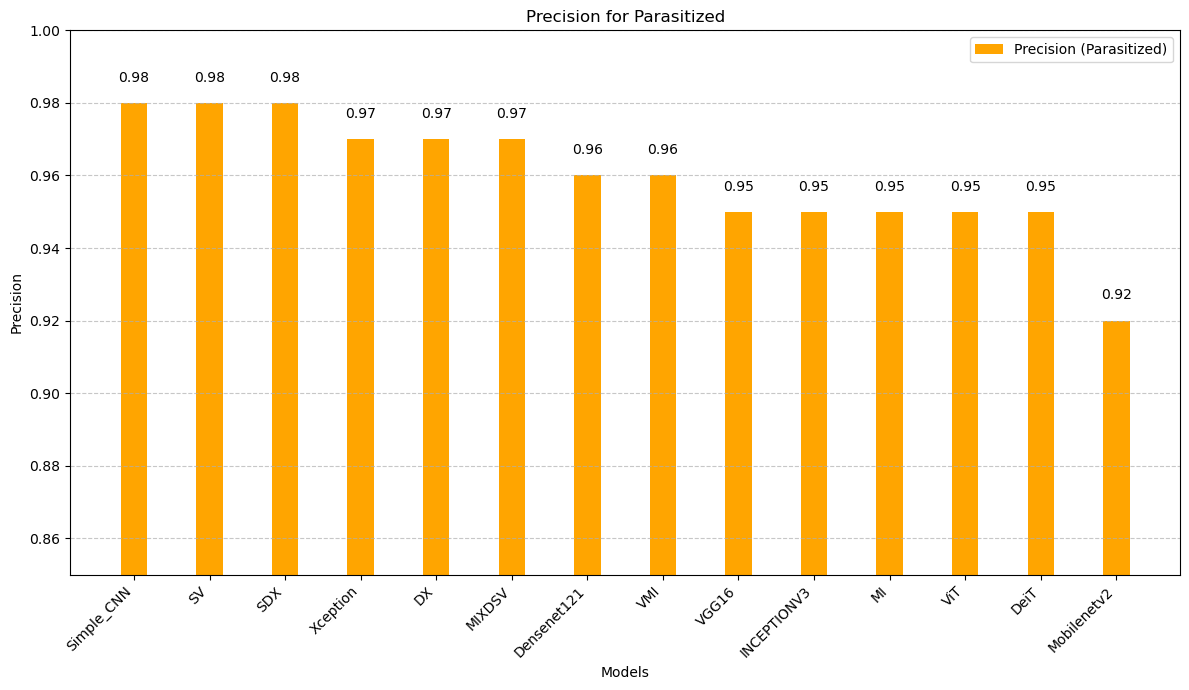

In [60]:
# Data for Precision (Parasitized)
precision_parasitized = [0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.92]
models = ['Simple_CNN', 'SV', 'SDX', 'Xception', 'DX', 'MIXDSV', 'Densenet121', 'VMI', 'VGG16', 'INCEPTIONV3', 'MI', 'ViT', 'DeiT', 'Mobilenetv2']

# Define x positions for the bars and width of the bars
x = np.arange(len(precision_parasitized))
width = 0.35  # Width of the bars

# Plotting the graph for Precision (Parasitized)
plt.figure(figsize=(12, 7))
bars = plt.bar(x, precision_parasitized, width, label='Precision (Parasitized)', color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customizations
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision for Parasitized')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.85, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [40]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],

'Precision (Uninfected)': [0.92, 0.90, 0.89, 0.88, 0.91, 0.91, 0.90, 0.93, 0.92, 0.92, 0.93, 0.93, 0.97, 0.98],
}

df = pd.DataFrame(data)

# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame by 'Accuracy Score' and 'Val_Accuracy'
sorted_results = results_df.sort_values(by=['Precision (Uninfected)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame
print("Model Precision Uninfected\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))

Model Precision Uninfected

+----+-------------+------------------------+
|    |   Models    | Precision (Uninfected) |
+----+-------------+------------------------+
| 0  |    DeiT     |          0.98          |
| 1  |     ViT     |          0.97          |
| 2  |     MI      |          0.93          |
| 3  |     VMI     |          0.93          |
| 4  |   MIXDSV    |          0.93          |
| 5  | Simple_CNN  |          0.92          |
| 6  |     SV      |          0.92          |
| 7  |     SDX     |          0.92          |
| 8  | INCEPTIONV3 |          0.91          |
| 9  | Mobilenetv2 |          0.91          |
| 10 |  Xception   |          0.9           |
| 11 |     DX      |          0.9           |
| 12 | Densenet121 |          0.89          |
| 13 |    VGG16    |          0.88          |
+----+-------------+------------------------+


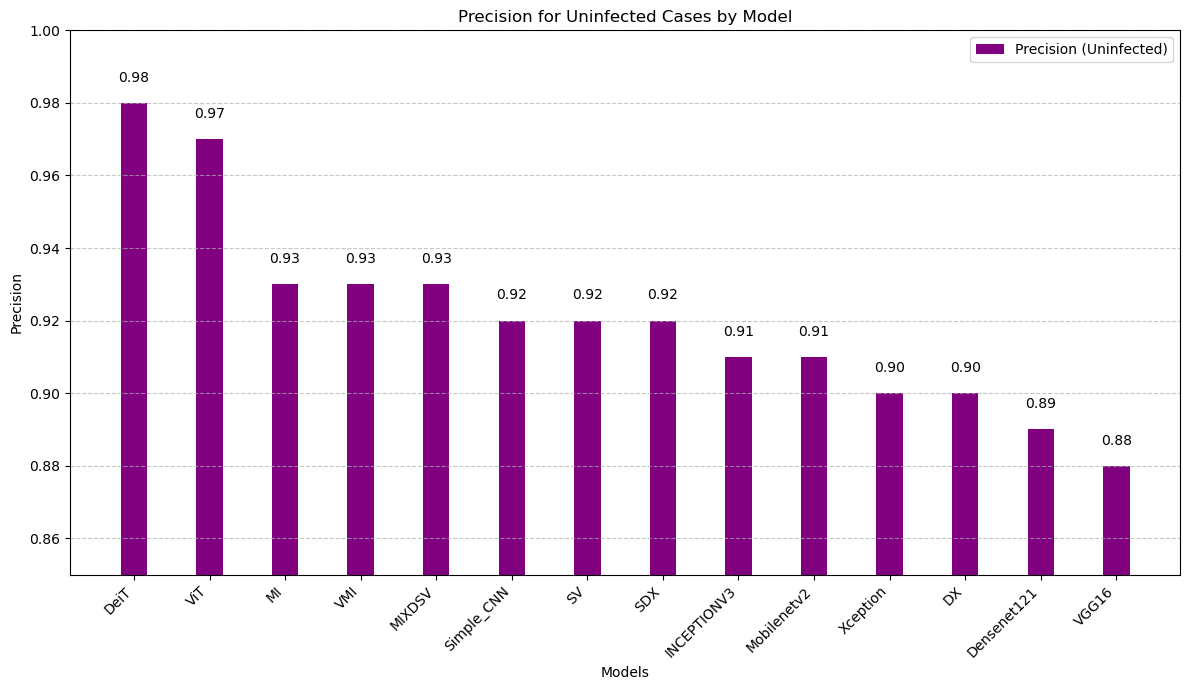

In [58]:
# Data for Precision
precision_uninfected = [0.98, 0.97, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 0.91, 0.91, 0.90, 0.90, 0.89, 0.88]
models = ['DeiT', 'ViT', 'MI', 'VMI', 'MIXDSV', 'Simple_CNN', 'SV', 'SDX', 'INCEPTIONV3', 'Mobilenetv2', 'Xception', 'DX','Densenet121', 'VGG16']

# Define x positions for the bars and width of the bars
x = np.arange(len(precision_uninfected))
width = 0.35  # Width of the bars

# Plotting the graph for Precision
plt.figure(figsize=(12, 7))
bars = plt.bar(x, precision_uninfected, width, label='Precision (Uninfected)', color='purple')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customizations
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision for Uninfected Cases by Model')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.85, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



Recall Comparism

In [ ]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],

'Recall (Parasitized)': [0.92, 0.90, 0.88, 0.87, 0.91, 0.92, 0.90, 0.93, 0.92, 0.92, 0.93, 0.92, 0.97, 0.95],
   
}


df = pd.DataFrame(data)

# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame
sorted_results = results_df.sort_values(by=['Recall (Parasitized)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame in tabular format
print("Model Recall for Parasitized\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))


Model Recall for Parasitized

+----+-------------+----------------------+
|    |   Models    | Recall (Parasitized) |
+----+-------------+----------------------+
| 0  |     ViT     |         0.97         |
| 1  |    DeiT     |         0.95         |
| 2  |     MI      |         0.93         |
| 3  |     VMI     |         0.93         |
| 4  | Simple_CNN  |         0.92         |
| 5  | Mobilenetv2 |         0.92         |
| 6  |     SV      |         0.92         |
| 7  |     SDX     |         0.92         |
| 8  |   MIXDSV    |         0.92         |
| 9  | INCEPTIONV3 |         0.91         |
| 10 |  Xception   |         0.9          |
| 11 |     DX      |         0.9          |
| 12 | Densenet121 |         0.88         |
| 13 |    VGG16    |         0.87         |
+----+-------------+----------------------+


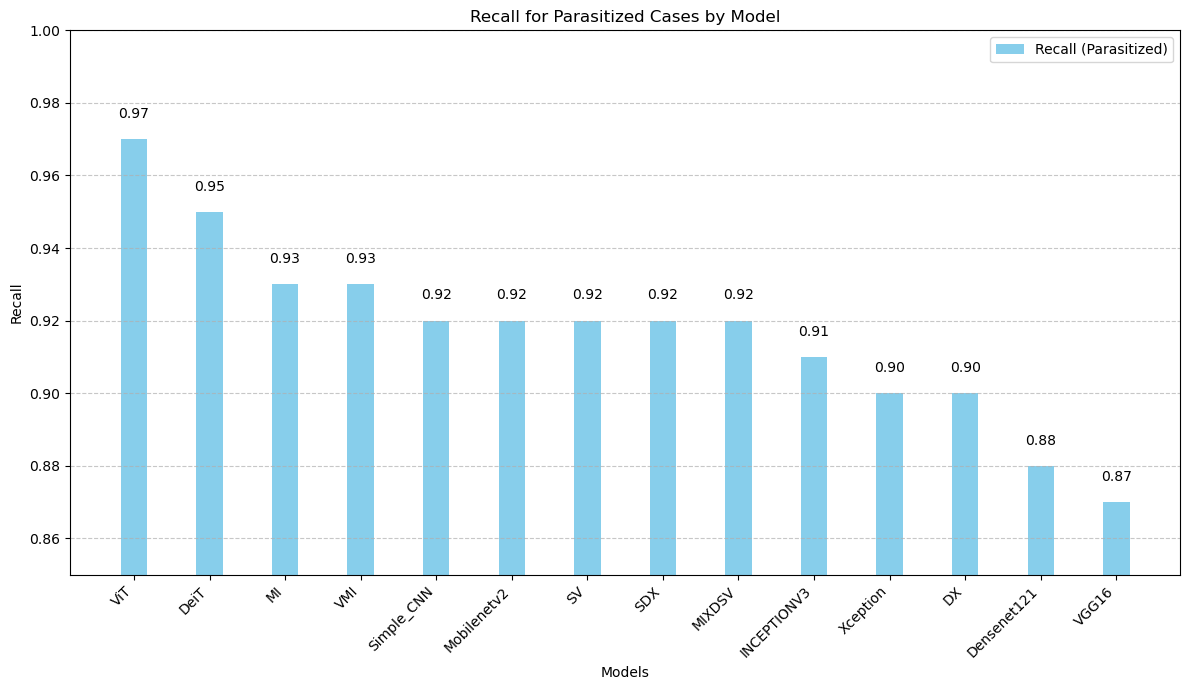

In [57]:
# Data
models = ['ViT', 'DeiT', 'MI', 'VMI',  'Simple_CNN', 'Mobilenetv2', 'SV','SDX', 'MIXDSV', 'INCEPTIONV3', 'Xception', 'DX', 'Densenet121', 'VGG16']
recall_parasitized = [0.97, 0.95, 0.93, 0.93, 0.92, 0.92, 0.92, 0.92, 0.92, 0.91, 0.90, 0.90, 0.88, 0.87]

# Plotting the graph
x = np.arange(len(recall_parasitized))
width = 0.35

plt.figure(figsize=(12, 7))
bars = plt.bar(x, recall_parasitized, width, label='Recall (Parasitized)', color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)




# Customizations
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall for Parasitized Cases by Model')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.85, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
data = {
'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],
'Recall (Uninfected)': [0.98, 0.97, 0.96, 0.95, 0.95, 0.92, 0.97, 0.95, 0.98, 0.98, 0.96, 0.97, 0.95, 0.98],
   
}

df = pd.DataFrame(data)

# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(df)

# Sort the DataFrame 
sorted_results = results_df.sort_values(by=['Recall (Uninfected)'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame in tabular format
print("Model Recall for Uninfected\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))


Model Recall for Uninfected

+----+-------------+---------------------+
|    |   Models    | Recall (Uninfected) |
+----+-------------+---------------------+
| 0  | Simple_CNN  |        0.98         |
| 1  |     SV      |        0.98         |
| 2  |     SDX     |        0.98         |
| 3  |    DeiT     |        0.98         |
| 4  |  Xception   |        0.97         |
| 5  |     DX      |        0.97         |
| 6  |   MIXDSV    |        0.97         |
| 7  | Densenet121 |        0.96         |
| 8  |     VMI     |        0.96         |
| 9  |    VGG16    |        0.95         |
| 10 | INCEPTIONV3 |        0.95         |
| 11 |     MI      |        0.95         |
| 12 |     ViT     |        0.95         |
| 13 | Mobilenetv2 |        0.92         |
+----+-------------+---------------------+


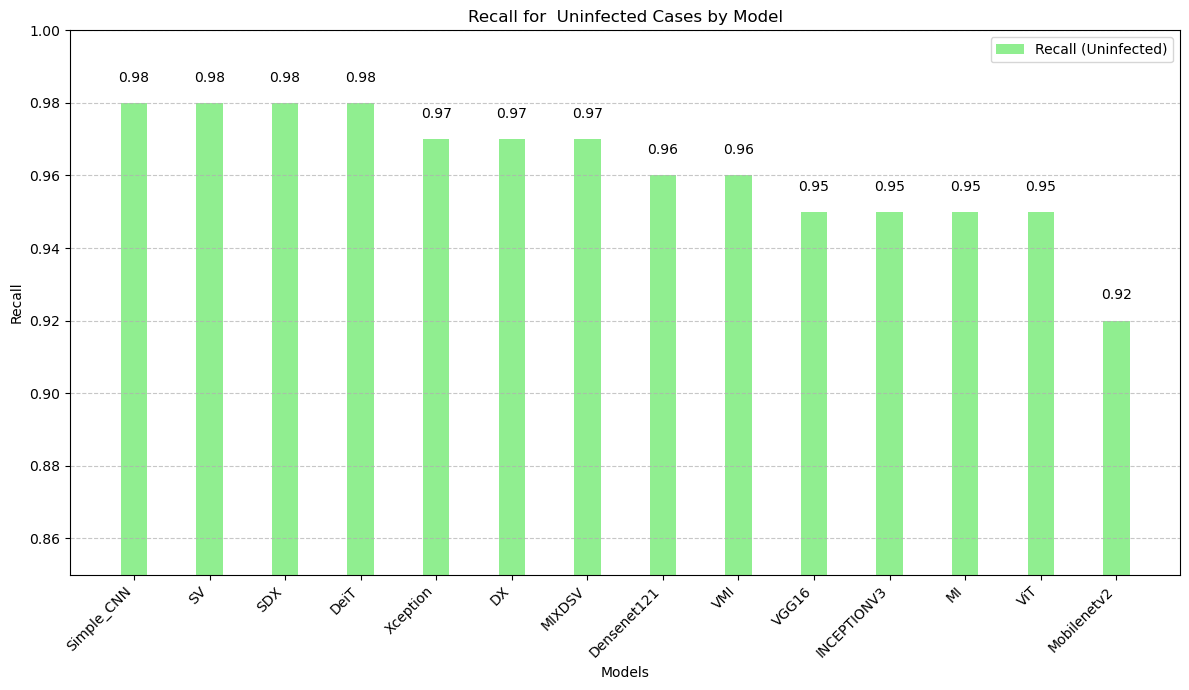

In [ ]:
# Data
models = ["Simple_CNN", "SV", "SDX", "DeiT", "Xception", "DX", "MIXDSV", "Densenet121", "VMI", "VGG16", "INCEPTIONV3", "MI", "ViT", "Mobilenetv2"]
recall_uninfected = [0.98, 0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.92]

# Plotting the graph
x = np.arange(len(recall_uninfected))
width = 0.35

plt.figure(figsize=(12, 7))
bars = plt.bar(x, recall_uninfected, width, label='Recall (Uninfected)', color='lightgreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)


# Customizations
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall for  Uninfected Cases by Model')
plt.xticks(x, models, rotation=45, ha="right")
plt.ylim([0.85, 1.0])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\kingk\AppData\Local\Temp\ipykernel_27312\3652223069.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(models, rotation=45, ha="right")
C:\Users\kingk\AppData\Local\Temp\ipykernel_27312\3652223069.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(models, rotation=45, ha="right")


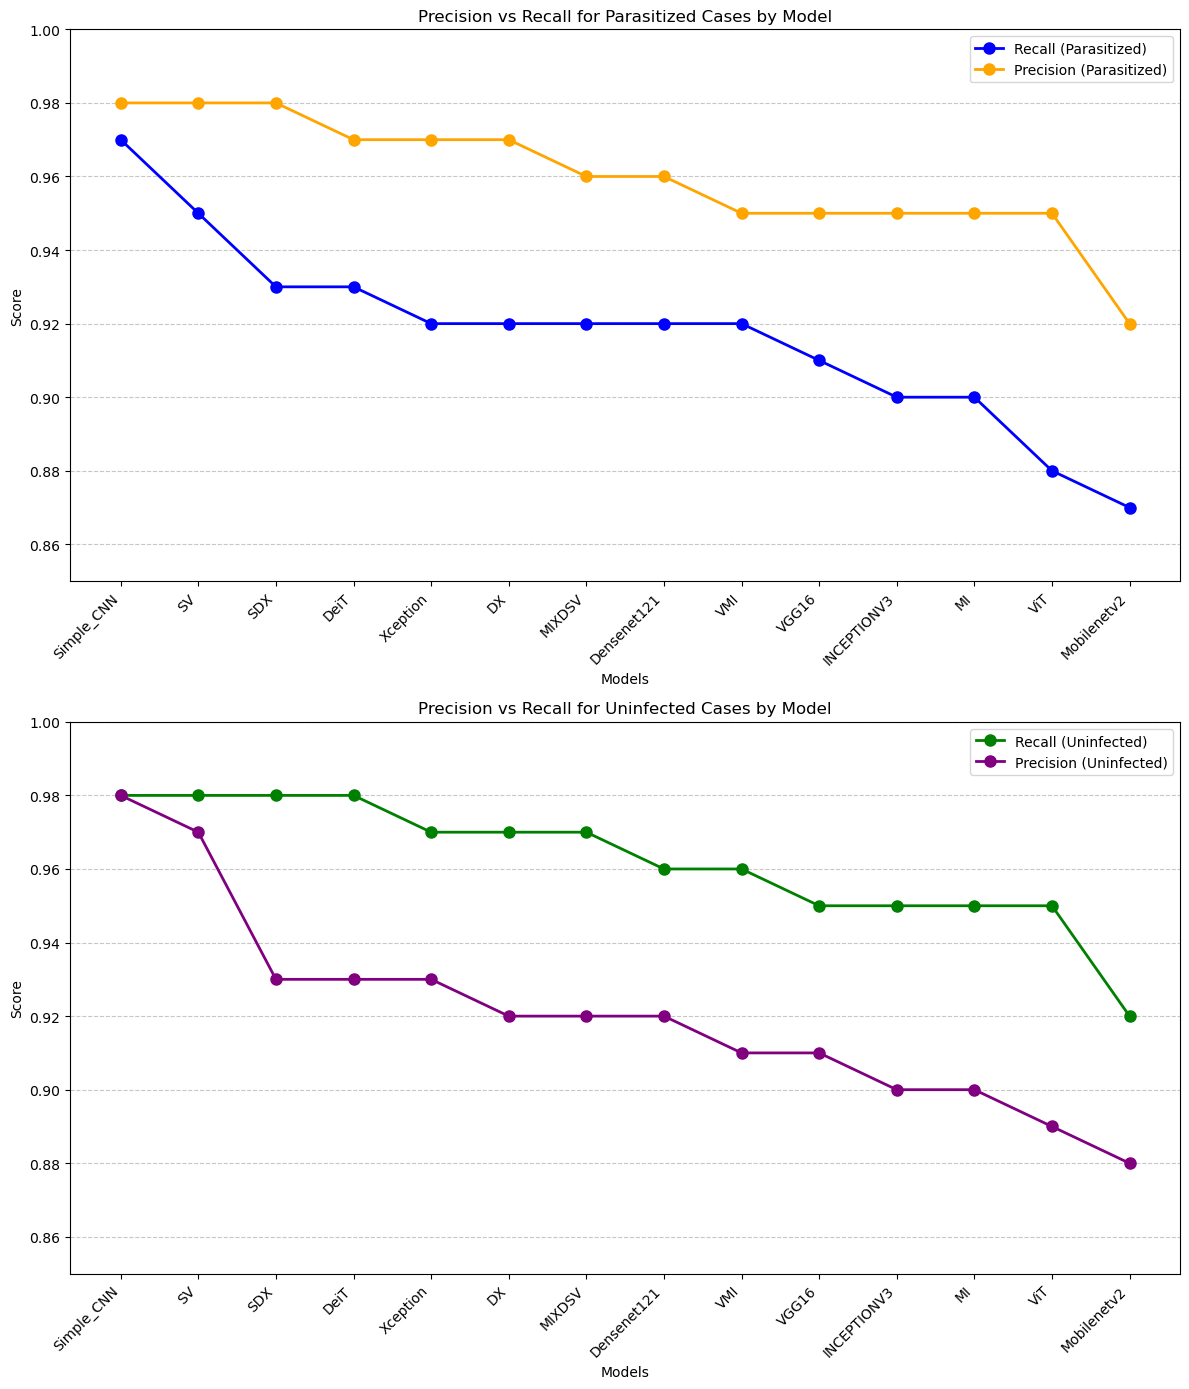

In [48]:
# Plotting Precision vs Recall for Parasitized and Uninfected Cases
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Parasitized Cases: Precision vs Recall
ax[0].plot(models, recall_parasitized, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Recall (Parasitized)')
ax[0].plot(models, precision_parasitized, marker='o', linestyle='-', color='orange', linewidth=2, markersize=8, label='Precision (Parasitized)')
ax[0].set_title('Precision vs Recall for Parasitized Cases by Model')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Score')
ax[0].set_ylim([0.85, 1.0])
ax[0].set_xticklabels(models, rotation=45, ha="right")
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].legend()

# Uninfected Cases: Precision vs Recall
ax[1].plot(models, recall_uninfected, marker='o', linestyle='-', color='green', linewidth=2, markersize=8, label='Recall (Uninfected)')
ax[1].plot(models, precision_uninfected, marker='o', linestyle='-', color='purple', linewidth=2, markersize=8, label='Precision (Uninfected)')
ax[1].set_title('Precision vs Recall for Uninfected Cases by Model')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Score')
ax[1].set_ylim([0.85, 1.0])
ax[1].set_xticklabels(models, rotation=45, ha="right")
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].legend()

plt.tight_layout()
plt.show()


Models ROC curve Comparison

In [5]:
# Data dictionary
data = {
    'Models': ['Simple_CNN', 'Xception', 'Densenet121', 'VGG16', 'INCEPTIONV3', 'Mobilenetv2', 'DX', 'MI', 'SV', 'SDX', 'VMI', 'MIXDSV', 'ViT', 'DeiT'],
    'ROC Curves': [0.99, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.98, 0.98, 0.99, 0.98, 0.99, 0.99, 0.99],
}

# Transform the dictionary to a DataFrame
results_df = pd.DataFrame(data)

# Sort the DataFrame by 'ROC Curves' in descending order
sorted_results = results_df.sort_values(by=['ROC Curves'], ascending=False)

# Reset the index
sorted_results_reset = sorted_results.reset_index(drop=True)

# Display the sorted and reset DataFrame using tabulate
print("Model ROC curve\n")
print(tabulate(sorted_results_reset, headers='keys', tablefmt='pretty'))


Model ROC curve

+----+-------------+------------+
|    |   Models    | ROC Curves |
+----+-------------+------------+
| 0  | Simple_CNN  |    0.99    |
| 1  |     SDX     |    0.99    |
| 2  |   MIXDSV    |    0.99    |
| 3  |     ViT     |    0.99    |
| 4  |    DeiT     |    0.99    |
| 5  |  Xception   |    0.98    |
| 6  | Densenet121 |    0.98    |
| 7  | INCEPTIONV3 |    0.98    |
| 8  |     DX      |    0.98    |
| 9  |     MI      |    0.98    |
| 10 |     SV      |    0.98    |
| 11 |     VMI     |    0.98    |
| 12 |    VGG16    |    0.97    |
| 13 | Mobilenetv2 |    0.97    |
+----+-------------+------------+


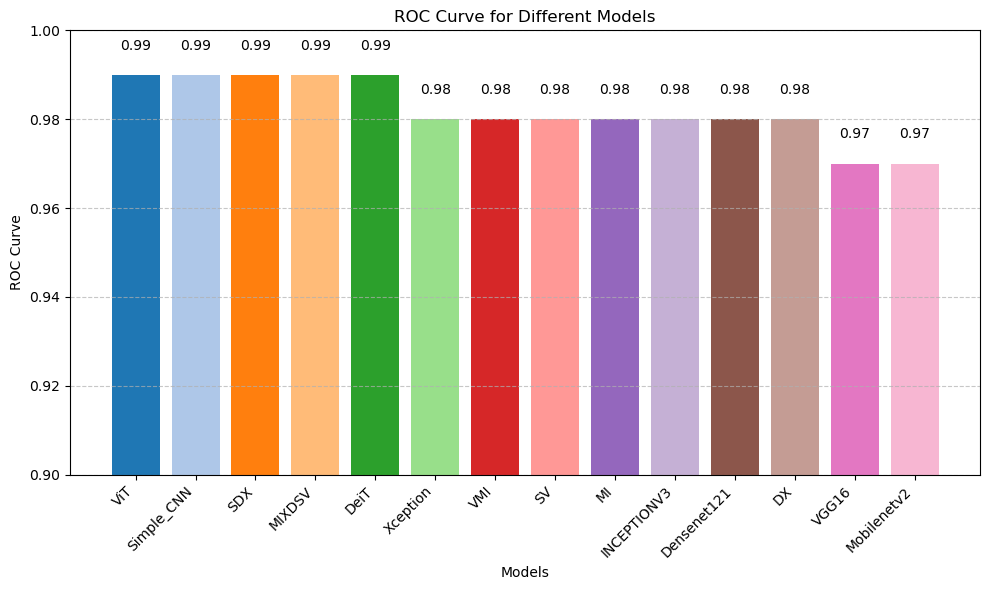

In [64]:
# Data
models = ["Simple_CNN", "Xception", "Densenet121",  "VGG16", "INCEPTIONV3",
          "Mobilenetv2", "DX", "MI", "SV", "SDX",  "VMI", "MIXDSV",  'ViT', 'DeiT']
roc_curves = [0.99, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.98, 0.98, 0.99, 0.98, 0.99, 0.99, 0.99]

# Sorting models based on ROC curves (highest to lowest)
sorted_models_roc = sorted(zip(roc_curves, models), reverse=True)
sorted_roc, sorted_models = zip(*sorted_models_roc)

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_roc, color=plt.cm.tab20.colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customizations
plt.xlabel('Models')
plt.ylabel('ROC Curve')
plt.title('ROC Curve for Different Models')
plt.xticks(rotation=45, ha="right")
plt.ylim([0.9, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


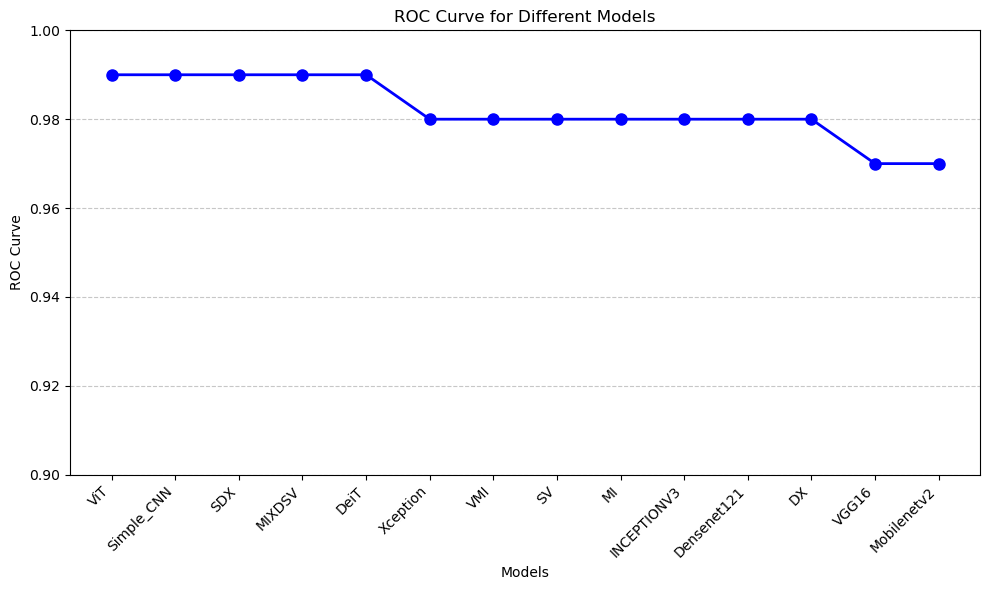

In [13]:
# Data
models = ["Simple_CNN", "Xception", "Densenet121",  "VGG16", "INCEPTIONV3",
          "Mobilenetv2", "DX", "MI", "SV", "SDX",  "VMI", "MIXDSV",  'ViT', 'DeiT']
roc_curves = [0.99, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.98, 0.98, 0.99, 0.98, 0.99, 0.99, 0.99]

# Sorting models based on ROC curves (highest to lowest)
sorted_roc, sorted_models = zip(*sorted(zip(roc_curves, models), reverse=True))

# Plotting the ROC curve as a line graph
plt.figure(figsize=(10, 6))

# Plot each model's ROC curve score with a line and marker
plt.plot(sorted_models, sorted_roc, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# Customizations
plt.xlabel('Models')
plt.ylabel('ROC Curve')
plt.title('ROC Curve for Different Models')
plt.xticks(rotation=45, ha="right")
plt.ylim([0.9, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
